SoftwareX paper example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime, timezone, timedelta
from pandas.tseries.offsets import DateOffset

In [2]:
''' 
Initalize the WecGrid package

create 2 WEC-Grid objects to compare with and without the WEC integration
'''
from WecGrid import WecGrid
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid_1 = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")

In [3]:
# Initalize PSSE !
wec_grid.initialize_psse("fnsl")
wec_grid_1.initialize_psse("fnsl")

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.3.2

             INITIATED ON WED, APR 16 2025  19:47
PSSE initialized with case file: IEEE_24_bus.R

In [4]:
#Initalize pyPSA! 
wec_grid.initialize_pypsa("fnsl")
wec_grid_1.initialize_pypsa("fnsl")

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-16 19:47:38.191179'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.325512 seconds


pyPSA initialized
PyPSA initialized with case file: IEEE_24_bus.RAW.


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-16 19:48:43.326084'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.140805 seconds


pyPSA initialized
PyPSA initialized with case file: IEEE_24_bus.RAW.


In [5]:
from IPython.display import display

# Let's review both our grid's dataframes
display(wec_grid.psseObj.dataframe.head())
display(wec_grid.pypsaObj.dataframe.head())

BUS_ID    Bus   BASE        PU     ANGLE  MISMATCH  Type      P Gen  \
0       1  BUS 1  138.0  1.000000  0.000000  0.000012     3  35.930069   
1       2  BUS 2  138.0  0.997822  0.000181  0.000000     2  67.000000   
2       3  BUS 3  138.0  0.863703  0.187725  0.000012     1        NaN   
3       4  BUS 4  138.0  0.887014 -0.007247  0.000007     1        NaN   
4       5  BUS 5  138.0  0.927217 -0.004004  0.000000     1        NaN   

        Q Gen  P Load     Q Load          P           Q        ΔP        ΔQ  \
0  180.488586     NaN        NaN  35.930069  180.488586  0.000000 -0.000012   
1    0.000000    97.0  20.000000 -30.000000  -20.000000  0.000000  0.000000   
2         NaN    90.0  19.000000 -90.000000  -19.000000 -0.000012  0.000000   
3         NaN    74.0  15.000001 -74.000000  -15.000001  0.000003 -0.000006   
4         NaN    71.0  14.000000 -71.000000  -14.000000  0.000000  0.000000   

    M_Angle     M_Mag  
0  0.000012 -1.570796  
1  0.000000  0.000000  
2  0.000012  3.141593  
3  0.000007 -1.107149  
4  0.000000  0.000000

Pd    Qd   Gs     Bs  area  v_mag_pu_set  v_ang_set  v_nom  zone  \
Bus                                                                       
1     0.0   0.0  0.0  120.0   1.0       1.00000     0.0000  138.0   1.0   
2    97.0  20.0  0.0    0.0   1.0       1.00000     0.0102  138.0   1.0   
3    90.0  19.0  0.0    0.0   1.0       0.86395    10.7472  138.0   1.0   
4    74.0  15.0  0.0    0.0   1.0       0.88721    -0.4167  138.0   1.0   
5    71.0  14.0  0.0    0.0   1.0       0.92693    -0.2237  138.0   1.0   

     v_mag_pu_max  v_mag_pu_min control type    x    y carrier  unit  \
Bus                                                                    
1             1.1           0.9   Slack       0.0  0.0      AC  None   
2             1.1           0.9      PV       0.0  0.0      AC  None   
3             1.1           0.9      PQ       0.0  0.0      AC  None   
4             1.1           0.9      PQ       0.0  0.0      AC  None   
5             1.1           0.9      PQ       0.0  0.0      AC  None   

    sub_network generator  
Bus                        
1             0        G0  
2             0        G1  
3             0       NaN  
4             0       NaN  
5             0       NaN

c:\users\alexb\research\wec-grid\WecGrid\PSSe\psse_wrapper.py:1187: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")


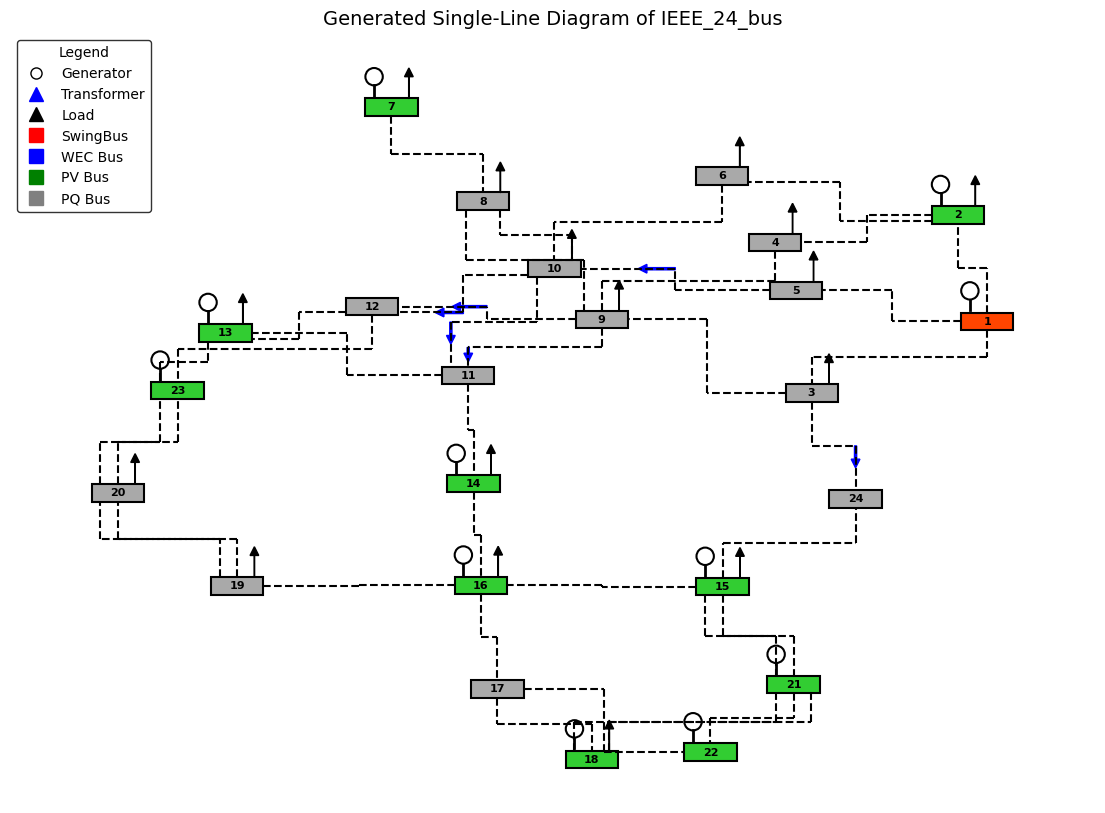

In [6]:
# Lets see what our grid looks like using the SLD generator for PSS/E. 
wec_grid.psseObj.sld()

In [7]:
# We can also visualize the grid using the standard Viz
wec_grid.psseObj.viz()

In [8]:
# Now we can start adding WECs to our grid. We first need to create a WEC object. In this cell we're going to simulate a new wec simulation and create a new WEC object from that run. Because we initalized both PSSE and pyPSA, we can see that both grid networks are altered similarly.
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=8, from_bus=7, to_bus=25, mbase= 1.0, config=config) 

Adding WECs to pyPSA network
Bus 25 added successfully.
Generator G1-RM3-60 added successfully to bus 25.
Generator G2-RM3-60 added successfully to bus 25.
Generator G3-RM3-60 added successfully to bus 25.
Generator G4-RM3-60 added successfully to bus 25.
Generator G5-RM3-60 added successfully to bus 25.
Generator G6-RM3-60 added successfully to bus 25.
Generator G7-RM3-60 added successfully to bus 25.
Generator G8-RM3-60 added successfully to bus 25.
Branch from 7 to 25 added successfully.


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-16 19:47:38.191179'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.181871 seconds


pyPSA network updated with WECs 

Adding WECs to PSS/E network
Bus 25 added successfully.
Plant data added successfully to bus 25.
Generator G1 added successfully to bus 25.
Generator G2 added successfully to bus 25.
Generator G3 added successfully to bus 25.
Generator G4 added successfully to bus 25.
Generator G5 added successfully to bus 25.
Generator G6 added successfully to bus 25.
Generator G7 added successfully to bus 25.
Generator G8 added successfully to bus 25.
Branch from 7 to 25 added successfully.


c:\users\alexb\research\wec-grid\WecGrid\PSSe\psse_wrapper.py:1187: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")


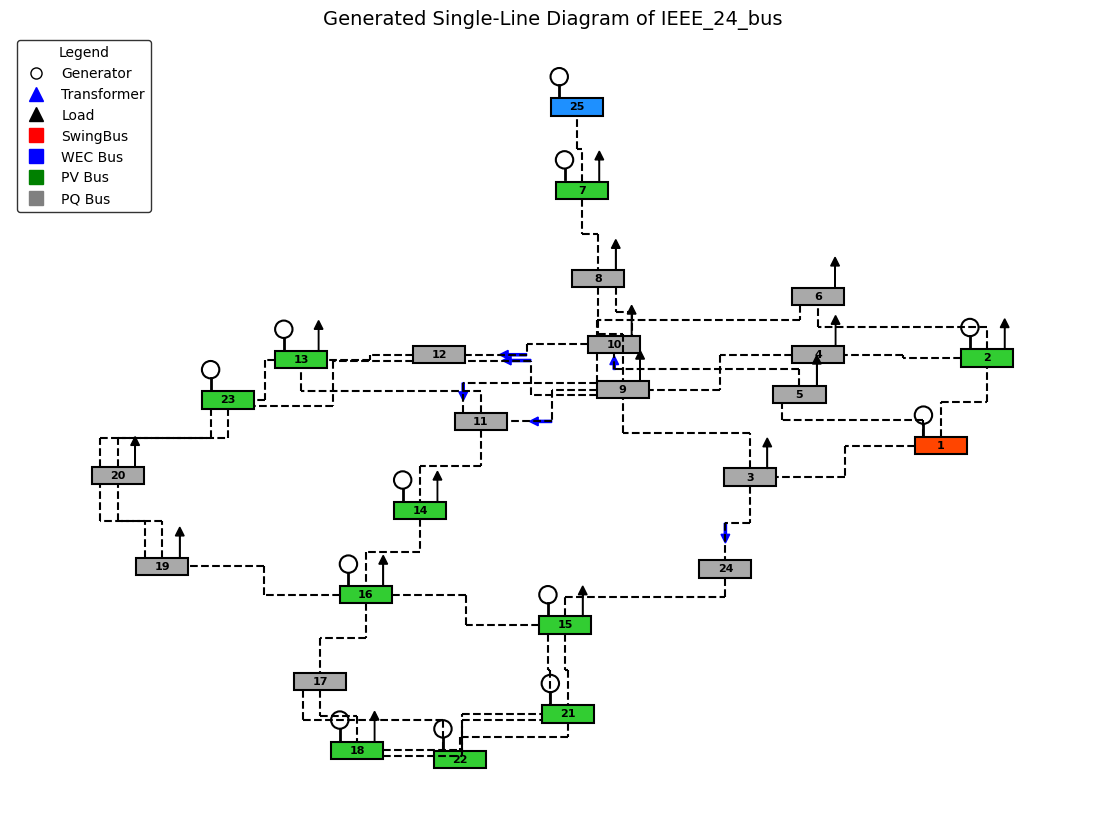

In [9]:
# we can re-run the SLD to see the new WEC added, 
wec_grid.psseObj.sld()

In [10]:
wec_grid.generate_load_curve()
wec_grid_1.generate_load_curve(time=wec_grid.wecObj_list[0].dataframe.time.to_list()) 

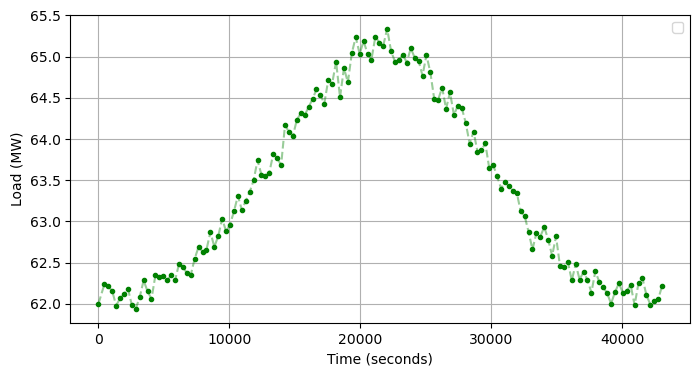

In [11]:
# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

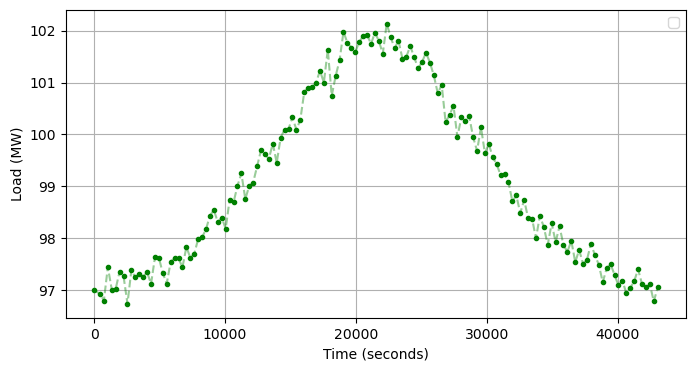

In [13]:
# Extract time steps and load profile data
time_steps = wec_grid.pypsaObj.load_profiles.index.to_list()
bus_7_load = wec_grid.pypsaObj.load_profiles["L0"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0)

time: 0.0 - error code: 0
time: 450.0 - error code: 0
time: 750.0 - error code: 0
time: 1050.0 - error code: 0
time: 1350.0 - error code: 0
time: 1650.0 - error code: 0
time: 1950.0 - error code: 0
time: 2250.0 - error code: 0
time: 2550.0 - error code: 0
time: 2850.0 - error code: 0
time: 3150.0 - error code: 0
time: 3450.0 - error code: 0
time: 3750.0 - error code: 0
time: 4050.0 - error code: 0
time: 4350.0 - error code: 0
time: 4650.0 - error code: 0
time: 4950.0 - error code: 0
time: 5250.0 - error code: 0
time: 5550.0 - error code: 0
time: 5850.0 - error code: 0
time: 6150.0 - error code: 0
time: 6450.0 - error code: 0
time: 6750.0 - error code: 0
time: 7050.0 - error code: 0
time: 7350.0 - error code: 0
time: 7650.0 - error code: 0
time: 7950.0 - error code: 0
time: 8250.0 - error code: 0
time: 8550.0 - error code: 0
time: 8850.0 - error code: 0
time: 9150.0 - error code: 0
time: 9450.0 - error code: 0
time: 9750.0 - error code: 0
time: 10050.0 - error code: 0
time: 10350.0 - er

In [14]:
wec_grid_1.psseObj.ac_injection(start=0, end=43050.0, time=wec_grid.wecObj_list[0].dataframe.time.to_list())

time: 0.0 - error code: 0
time: 450.0 - error code: 0
time: 750.0 - error code: 0
time: 1050.0 - error code: 0
time: 1350.0 - error code: 0
time: 1650.0 - error code: 0
time: 1950.0 - error code: 0
time: 2250.0 - error code: 0
time: 2550.0 - error code: 0
time: 2850.0 - error code: 0
time: 3150.0 - error code: 0
time: 3450.0 - error code: 0
time: 3750.0 - error code: 0
time: 4050.0 - error code: 0
time: 4350.0 - error code: 0
time: 4650.0 - error code: 0
time: 4950.0 - error code: 0
time: 5250.0 - error code: 0
time: 5550.0 - error code: 0
time: 5850.0 - error code: 0
time: 6150.0 - error code: 0
time: 6450.0 - error code: 0
time: 6750.0 - error code: 0
time: 7050.0 - error code: 0
time: 7350.0 - error code: 0
time: 7650.0 - error code: 0
time: 7950.0 - error code: 0
time: 8250.0 - error code: 0
time: 8550.0 - error code: 0
time: 8850.0 - error code: 0
time: 9150.0 - error code: 0
time: 9450.0 - error code: 0
time: 9750.0 - error code: 0
time: 10050.0 - error code: 0
time: 10350.0 - er

In [15]:
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-16 16:31:58.866643', '2025-04-16 16:36:58.866643',
               '2025-04-16 16:41:58.866643', '2025-04-16 16:46:58.866643',
               '2025-04-16 16:51:58.866643', '2025-04-16 16:56:58.866643',
               '2025-04-16 17:01:58.866643', '2025-04-16 17:06:58.866643',
               '2025-04-16 17:11:58.866643', '2025-04-16 17:16:58.866643',
               ...
               '2025-04-17 03:41:58.866643', '2025-04-17 03:46:58.866643',
               '2025-04-17 03:51:58.866643', '2025-04-17 03:56:58.866643',
               '2025-04-17 04:01:58.866643', '2025-04-17 04:06:58.866643',
               '2025-04-17 04:11:58.866643', '2025-04-17 04:16:58.866643',
               '2025-04-17 04:21:58.866643', '2025-04-17 04:26:58.866643'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with erro

In [16]:
# num_snapshots = len(wec_grid.wecObj_list[0].dataframe['pg'])

# timestamp_start = datetime.now()
# snapshots = pd.date_range(
#     start= timestamp_start + DateOffset(minutes=5),  # Add 5 minutes
#     periods=num_snapshots,
#     freq="5T",  # 5-minute intervals
# )
wec_grid_1.pypsaObj.ac_injection(snapshots=wec_grid.pypsaObj.snapshots)

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-16 16:31:58.866643', '2025-04-16 16:36:58.866643',
               '2025-04-16 16:41:58.866643', '2025-04-16 16:46:58.866643',
               '2025-04-16 16:51:58.866643', '2025-04-16 16:56:58.866643',
               '2025-04-16 17:01:58.866643', '2025-04-16 17:06:58.866643',
               '2025-04-16 17:11:58.866643', '2025-04-16 17:16:58.866643',
               ...
               '2025-04-17 03:41:58.866643', '2025-04-17 03:46:58.866643',
               '2025-04-17 03:51:58.866643', '2025-04-17 03:56:58.866643',
               '2025-04-17 04:01:58.866643', '2025-04-17 04:06:58.866643',
               '2025-04-17 04:11:58.866643', '2025-04-17 04:16:58.866643',
               '2025-04-17 04:21:58.866643', '2025-04-17 04:26:58.866643'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with erro

In [ ]:
'''
    Now need to review the simulation results and compare
'''

In [ ]:
'''
    1st compare each software with itself
'''

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


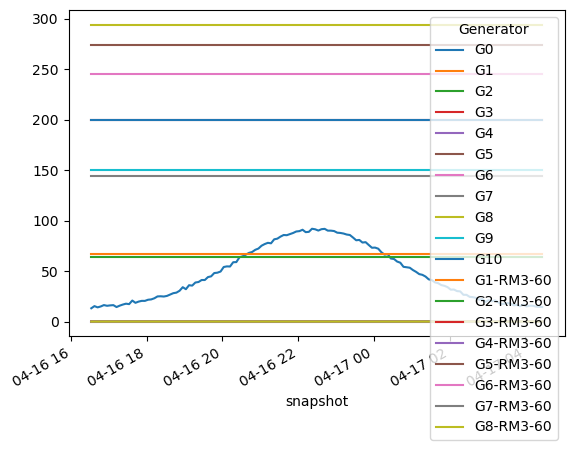

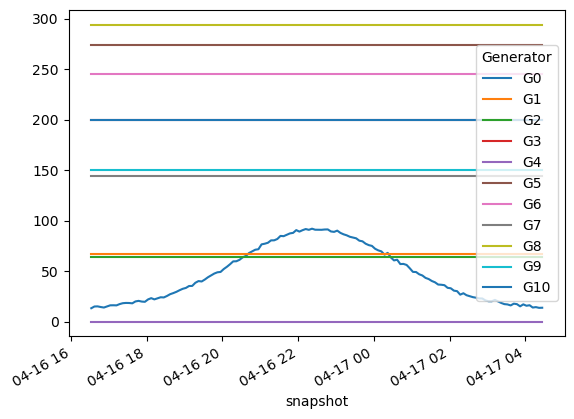

In [17]:
'''
    Review the pyPSA generator results
    
    notice the 1st plot has the addiontal generator from the WEC, while the 2nd plot does not.
    Not much change in the other generators responses visually
'''
print(wec_grid.pypsaObj.pypsa_object.generators_t.p.plot())
print(wec_grid_1.pypsaObj.pypsa_object.generators_t.p.plot())

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


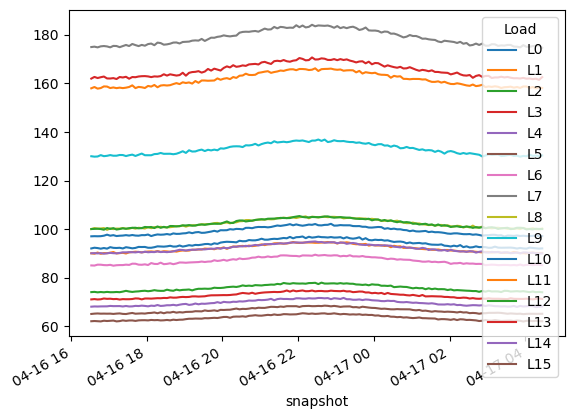

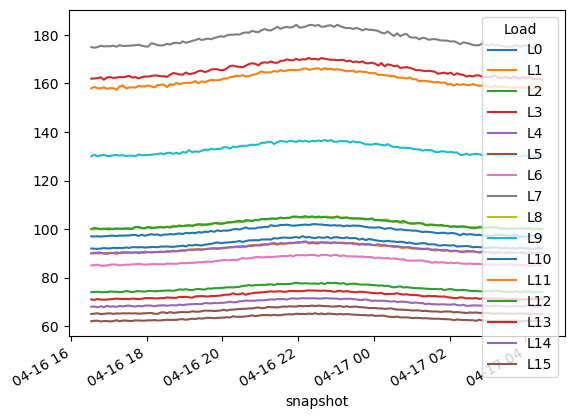

In [18]:
'''
    should be exactly the same
'''
print(wec_grid.pypsaObj.pypsa_object.loads_t.p.plot())
print(wec_grid_1.pypsaObj.pypsa_object.loads_t.p.plot())

In [29]:
wec_grid.pypsaObj.pypsa_object.buses_t.p['1']

snapshot
2025-04-16 16:31:58.866643    13.178339
2025-04-16 16:36:58.866643    15.304158
2025-04-16 16:41:58.866643    14.068334
2025-04-16 16:46:58.866643    14.971353
2025-04-16 16:51:58.866643    16.331608
                                ...    
2025-04-17 04:06:58.866643    15.725438
2025-04-17 04:11:58.866643    15.662367
2025-04-17 04:16:58.866643    14.838627
2025-04-17 04:21:58.866643    14.601289
2025-04-17 04:26:58.866643    14.422773
Freq: 5T, Name: 1, Length: 144, dtype: float64

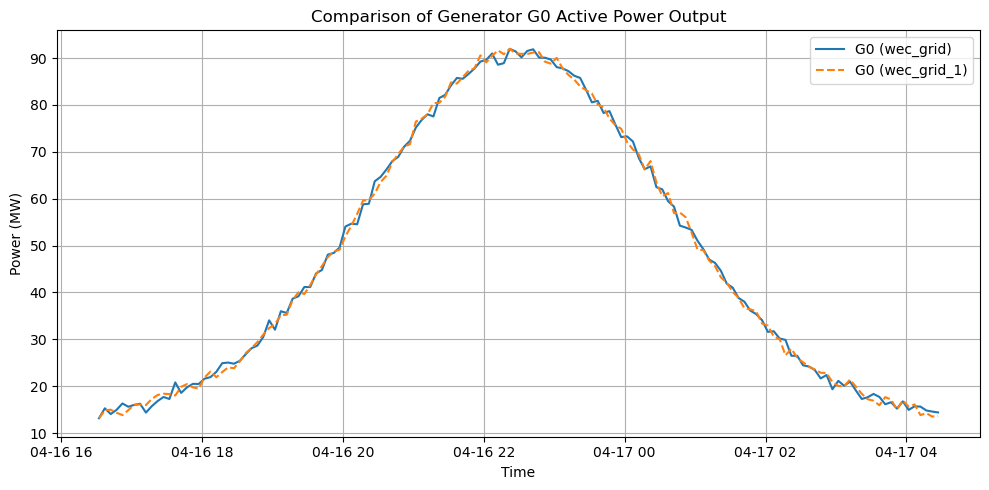

In [23]:
import matplotlib.pyplot as plt

# Extract the series
g0_series = wec_grid.pypsaObj.pypsa_object.generators_t.p['G0']
g0_series_1 = wec_grid_1.pypsaObj.pypsa_object.generators_t.p['G0']

# Plot both
plt.figure(figsize=(10, 5))
plt.plot(g0_series.index, g0_series.values, label='G0 (wec_grid)', color='tab:blue')
plt.plot(g0_series_1.index, g0_series_1.values, label='G0 (wec_grid_1)', color='tab:orange', linestyle='--')

# Labels, title, legend, grid
plt.title("Comparison of Generator G0 Active Power Output")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

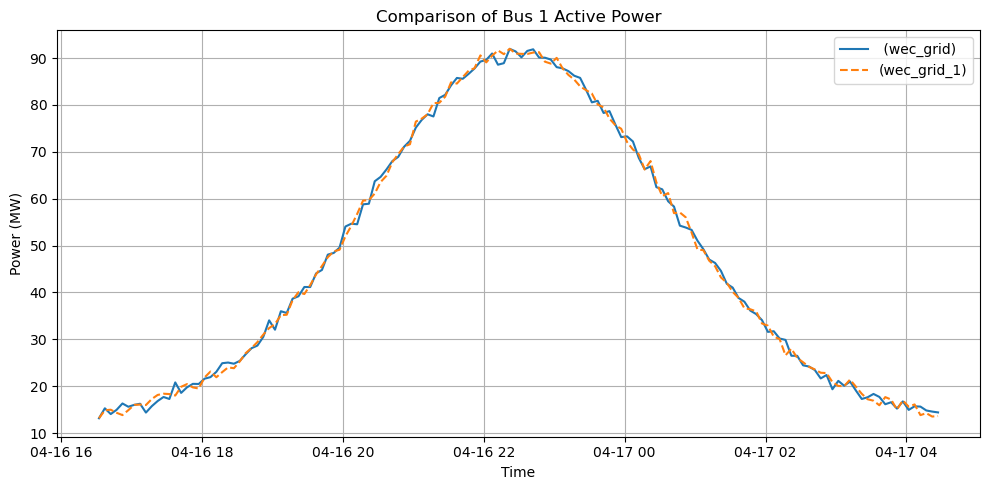

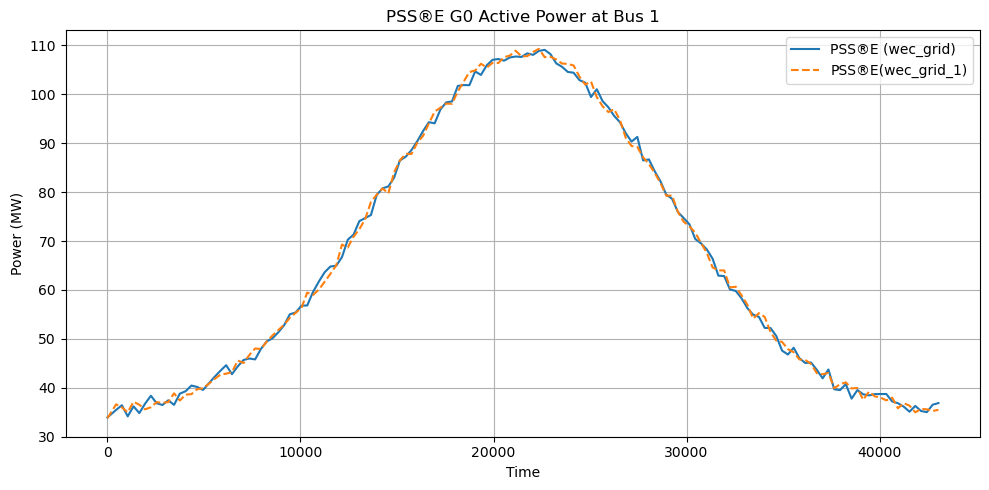

In [62]:
'''
pyPSA comparison of bus 1 with and without the WEC integration
'''
# Extract the series
bus_series = wec_grid.pypsaObj.pypsa_object.buses_t.p['1']
bus_series_1 = wec_grid_1.pypsaObj.pypsa_object.buses_t.p['1']

# Plot both
plt.figure(figsize=(10, 5))
plt.plot(bus_series.index, bus_series.values, label=' (wec_grid)', color='tab:blue')
plt.plot(bus_series_1.index, bus_series_1.values, label='(wec_grid_1)', color='tab:orange', linestyle='--')

# Labels, title, legend, grid
plt.title("Comparison of Bus 1 Active Power")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

'''
    PSS/E comparison of bus 1 with and without the WEC integration
'''
bus_id = 1
time = wec_grid.psseObj.history.keys() 
p = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

p_1 = [wec_grid_1.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

import matplotlib.pyplot as plt

# Convert time to list in case it's not already indexable
time_list = list(time)
time_list = time_list[1:]

plt.figure(figsize=(10, 5))

# Plot both series
plt.plot(time_list, p, label="PSS®E (wec_grid)", color="tab:blue")
plt.plot(time_list, p_1, label="PSS®E(wec_grid_1)", color="tab:orange", linestyle="--")

# Labeling
plt.title("PSS®E G0 Active Power at Bus {}".format(bus_id))
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

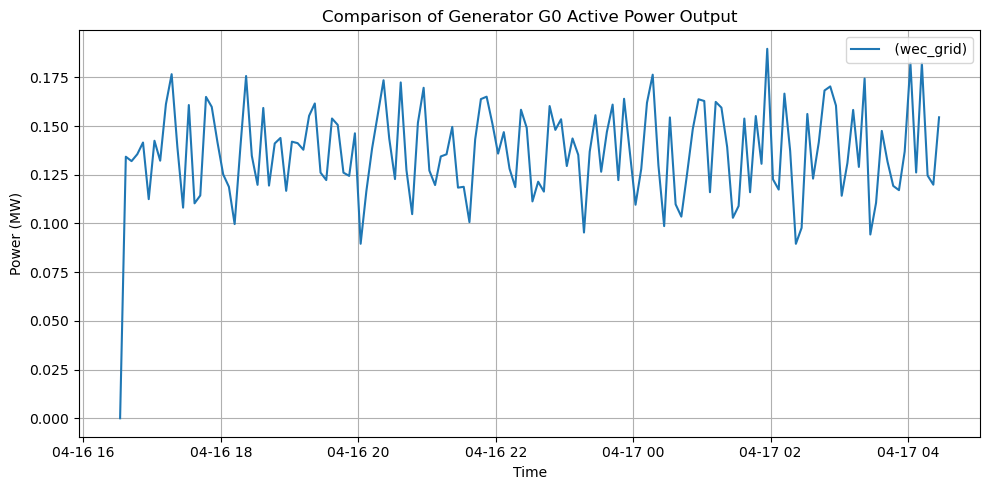

In [34]:
# Extract the series
bus_series = wec_grid.pypsaObj.pypsa_object.buses_t.p['25']


# Plot both
plt.figure(figsize=(10, 5))
plt.plot(bus_series.index, bus_series.values, label=' (wec_grid)', color='tab:blue')

# Labels, title, legend, grid
plt.title("Comparison of Generator G0 Active Power Output")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
wec_grid.pypsaObj.pypsa_object.buses

Pd    Qd   Gs     Bs  area  v_mag_pu_set  v_ang_set  v_nom  zone  \
Bus                                                                        
1      0.0   0.0  0.0  120.0   1.0       1.00000     0.0000  138.0   1.0   
2     97.0  20.0  0.0    0.0   1.0       1.00000     0.0102  138.0   1.0   
3     90.0  19.0  0.0    0.0   1.0       0.86395    10.7472  138.0   1.0   
4     74.0  15.0  0.0    0.0   1.0       0.88721    -0.4167  138.0   1.0   
5     71.0  14.0  0.0    0.0   1.0       0.92693    -0.2237  138.0   1.0   
6     68.0  14.0  0.0  100.0   1.0       0.90837     0.3902  138.0   1.0   
7     62.0  13.0  0.0    0.0   1.0       1.00000    -0.5811  138.0   1.0   
8     85.0  18.0  0.0    0.0   1.0       0.80581    -0.8692  230.0   1.0   
9    175.0  36.0  0.0    0.0   1.0       0.83528     4.9829  138.0   1.0   
10   100.0  23.0  0.0    0.0   1.0       0.88216     3.7178  138.0   1.0   
11     0.0   0.0  0.0    0.0   1.0       0.83645    12.6275  230.0   1.0   
12     0.0   0.0  0.0    0.0   1.0       0.84016    11.7711  230.0   1.0   
13   130.0  27.0  0.0    0.0   1.0       1.00000    15.4352  230.0   1.0   
14    92.0  20.0  0.0    0.0   1.0       1.00000    18.7410  230.0   1.0   
15   158.0  32.0  0.0    0.0   1.0       1.00000    33.1896  230.0   1.0   
16   100.0  20.0  0.0    0.0   1.0       1.00000    27.0625  230.0   1.0   
17     0.0   0.0  0.0    0.0   1.0       0.89595    32.0375  230.0   1.0   
18   162.0  34.0  0.0    0.0   1.0       1.00000    33.8753  230.0   1.0   
19    90.0  18.0  0.0    0.0   1.0       0.85215    23.7833  230.0   1.0   
20    65.0  13.0  0.0    0.0   1.0       0.84969    22.3112  230.0   1.0   
21     0.0   0.0  0.0    0.0   1.0       1.00000    35.6336  230.0   1.0   
22     0.0   0.0  0.0    0.0   1.0       1.00000    37.4784  230.0   1.0   
23     0.0   0.0  0.0    0.0   1.0       1.00000    22.0594  230.0   1.0   
24     0.0   0.0  0.0    0.0   1.0       0.85521    24.7952  230.0   1.0   
25     NaN   NaN  NaN    NaN   NaN       1.00000        NaN  138.0   NaN   

     v_mag_pu_max  v_mag_pu_min control type    x    y carrier  unit  \
Bus                                                                    
1            1.10          0.90   Slack       0.0  0.0      AC  None   
2            1.10          0.90      PV       0.0  0.0      AC  None   
3            1.10          0.90      PQ       0.0  0.0      AC  None   
4            1.10          0.90      PQ       0.0  0.0      AC  None   
5            1.10          0.90      PQ       0.0  0.0      AC  None   
6            1.10          0.90      PQ       0.0  0.0      AC  None   
7            1.10          0.90      PV       0.0  0.0      AC  None   
8            1.10          0.90      PQ       0.0  0.0      AC  None   
9            1.10          0.90      PQ       0.0  0.0      AC  None   
10           1.10          0.90      PQ       0.0  0.0      AC  None   
11           1.10          0.90      PQ       0.0  0.0      AC  None   
12           1.10          0.90      PQ       0.0  0.0      AC  None   
13           1.10          0.90      PV       0.0  0.0      AC  None   
14           1.10          0.90      PV       0.0  0.0      AC  None   
15           1.10          0.90      PV       0.0  0.0      AC  None   
16           1.10          0.90      PV       0.0  0.0      AC  None   
17           1.10          0.90      PQ       0.0  0.0      AC  None   
18           1.10          0.90      PV       0.0  0.0      AC  None   
19           1.10          0.90      PQ       0.0  0.0      AC  None   
20           1.10          0.90      PQ       0.0  0.0      AC  None   
21           1.10          0.90      PV       0.0  0.0      AC  None   
22           1.10          0.90      PV       0.0  0.0      AC  None   
23           1.10          0.90      PV       0.0  0.0      AC  None   
24           1.10          0.90      PQ       0.0  0.0      AC  None   
25           1.05          0.95      PV       0.0  0.0      AC  None   

    sub_ne

In [20]:
wec_grid.wecObj_list[0].dataframe.pg

0      0.000000
1      0.016780
2      0.016497
3      0.016940
4      0.017691
         ...   
139    0.015768
140    0.022782
141    0.015574
142    0.014986
143    0.019310
Name: pg, Length: 144, dtype: float64

<AxesSubplot:xlabel='snapshot'>

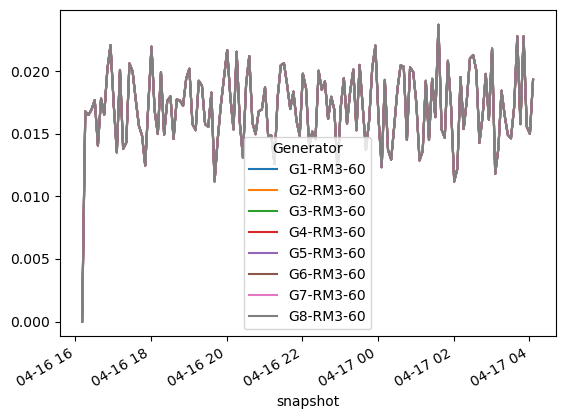

In [21]:
wec_grid.pypsaObj.pypsa_object.generators_t.p.iloc[:, -8:].plot()

In [48]:
len(p)

144

In [49]:
len(p_1)

144

In [59]:
time = wec_grid.psseObj.history.keys()
time_list = list(time)
time_list[1:]

[0.0,
 450.0,
 750.0,
 1050.0,
 1350.0,
 1650.0,
 1950.0,
 2250.0,
 2550.0,
 2850.0,
 3150.0,
 3450.0,
 3750.0,
 4050.0,
 4350.0,
 4650.0,
 4950.0,
 5250.0,
 5550.0,
 5850.0,
 6150.0,
 6450.0,
 6750.0,
 7050.0,
 7350.0,
 7650.0,
 7950.0,
 8250.0,
 8550.0,
 8850.0,
 9150.0,
 9450.0,
 9750.0,
 10050.0,
 10350.0,
 10650.0,
 10950.0,
 11250.0,
 11550.0,
 11850.0,
 12150.0,
 12450.0,
 12750.0,
 13050.0,
 13350.0,
 13650.0,
 13950.0,
 14250.0,
 14550.0,
 14850.0,
 15150.0,
 15450.0,
 15750.0,
 16050.0,
 16350.0,
 16650.0,
 16950.0,
 17250.0,
 17550.0,
 17850.0,
 18150.0,
 18450.0,
 18750.0,
 19050.0,
 19350.0,
 19650.0,
 19950.0,
 20250.0,
 20550.0,
 20850.0,
 21150.0,
 21450.0,
 21750.0,
 22050.0,
 22350.0,
 22650.0,
 22950.0,
 23250.0,
 23550.0,
 23850.0,
 24150.0,
 24450.0,
 24750.0,
 25050.0,
 25350.0,
 25650.0,
 25950.0,
 26250.0,
 26550.0,
 26850.0,
 27150.0,
 27450.0,
 27750.0,
 28050.0,
 28350.0,
 28650.0,
 28950.0,
 29250.0,
 29550.0,
 29850.0,
 30150.0,
 30450.0,
 30750.0,
 31050.0

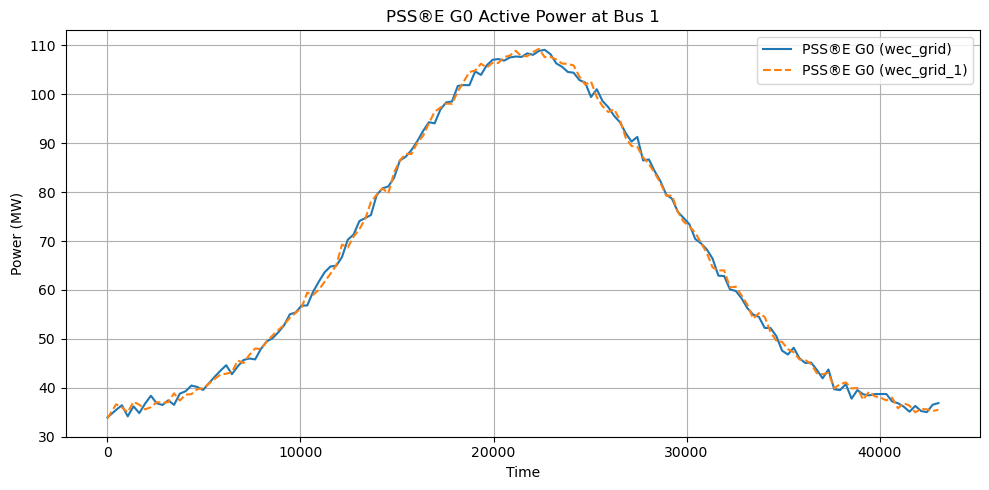

In [60]:
bus_id = 1
time = wec_grid.psseObj.history.keys() 
p = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

p_1 = [wec_grid_1.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

import matplotlib.pyplot as plt

# Convert time to list in case it's not already indexable
time_list = list(time)
time_list = time_list[1:]

plt.figure(figsize=(10, 5))

# Plot both series
plt.plot(time_list, p, label="PSS®E G0 (wec_grid)", color="tab:blue")
plt.plot(time_list, p_1, label="PSS®E G0 (wec_grid_1)", color="tab:orange", linestyle="--")

# Labeling
plt.title("PSS®E G0 Active Power at Bus {}".format(bus_id))
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# post processing 

In [10]:
import pandas as pd

# Extract time and load data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create DataFrame
df = pd.DataFrame({"time": time_steps, "load": bus_7_load})

# Save to CSV (for LaTeX)
df.to_csv("load_curve_data.csv", index=False)


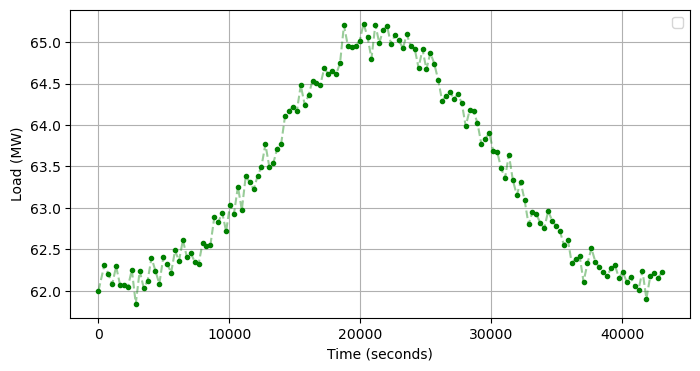

In [11]:
import matplotlib.pyplot as plt

# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

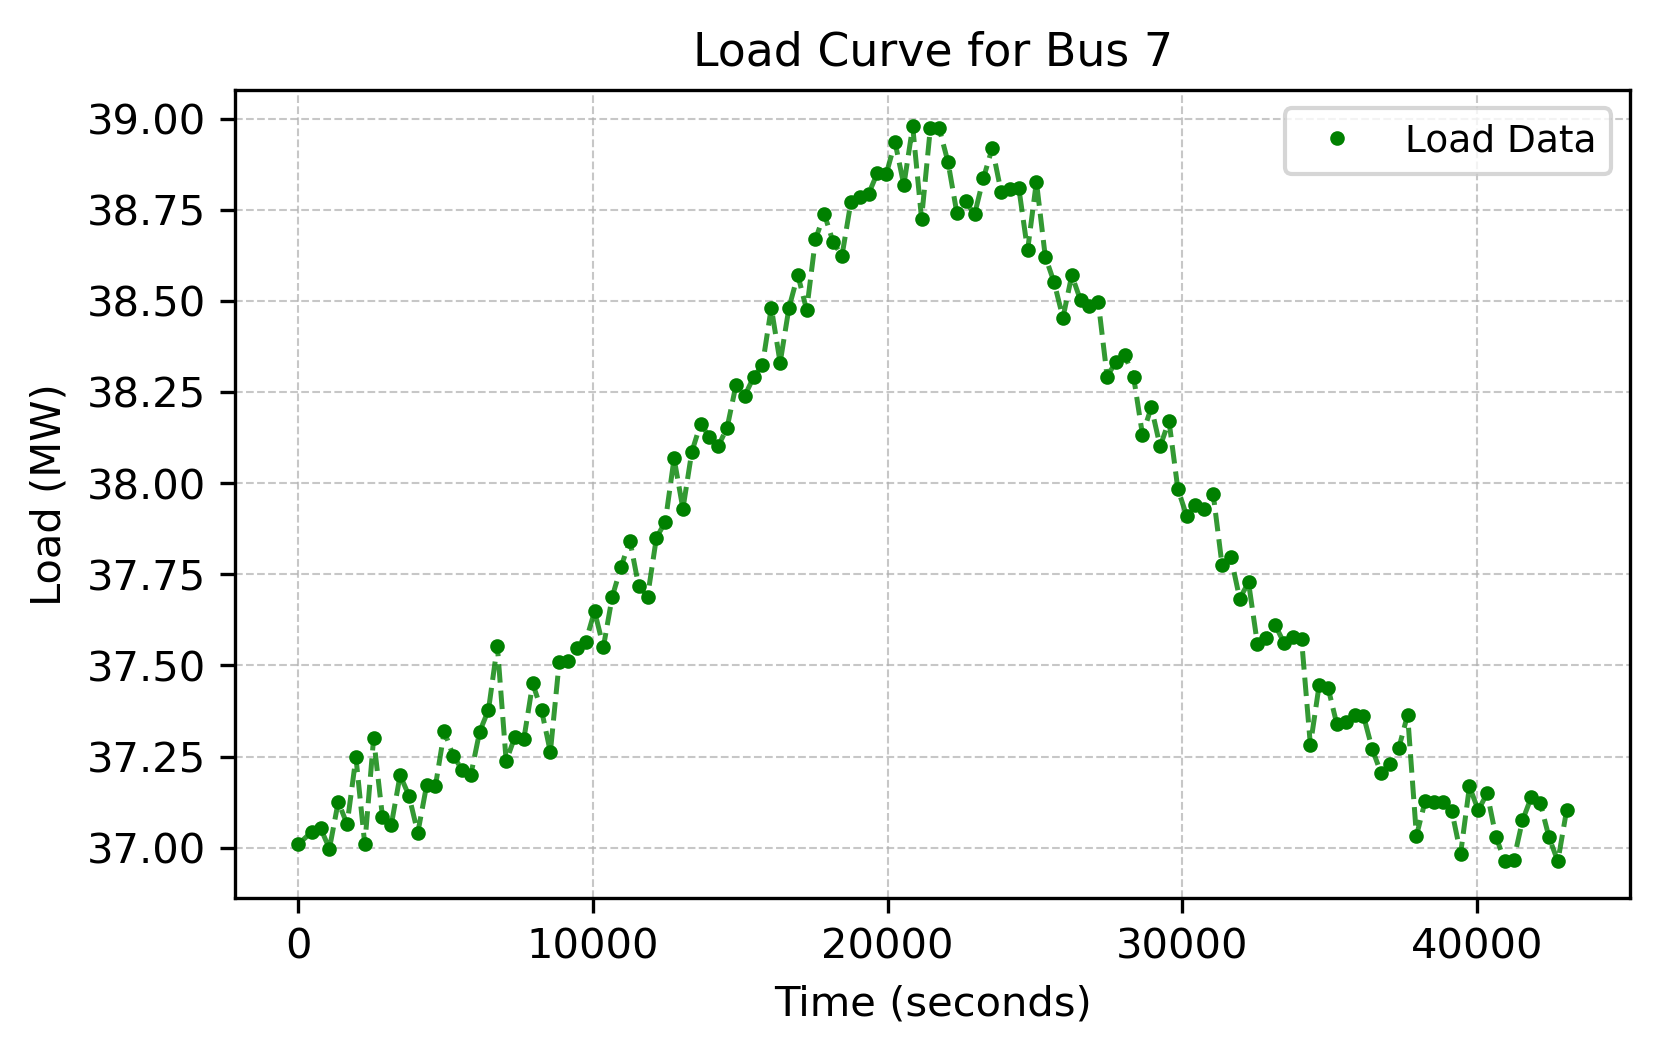

In [ ]:
import matplotlib.pyplot as plt

# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot with proper scaling
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)  # Scales well in papers

# Plot with high-quality markers and lines
ax.plot(time_steps, bus_7_load, 'o', color='green', markersize=3, markeredgewidth=0.5, label="Load Value")
ax.plot(time_steps, bus_7_load, '--', color='green', linewidth=1.2, alpha=0.8)

# Labels and title
ax.set_xlabel("Time (seconds)", fontsize=10)
ax.set_ylabel("Load (MW)", fontsize=10)
#ax.set_title("Load Curve for Bus 7", fontsize=11)
ax.legend(fontsize=9)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Save as a high-quality PDF
plt.savefig("load_curve_bus7.pdf", format="pdf", bbox_inches="tight")  # Save for paper

# Save as PNG (optional)
plt.savefig("load_curve_bus7.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 1

pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P Gen"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P Gen"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pgen_no_wec, label="No WEC - P Gen (MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P Gen (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P Gen (MW)")
plt.title(f"Bus {bus_id} Active Power (P Gen) Over Time")
plt.legend()
plt.grid()
plt.show()

In [12]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0)


time: 0.0 - error code: 0
time: 450.0 - error code: 0
time: 750.0 - error code: 0
time: 1050.0 - error code: 0
time: 1350.0 - error code: 0
time: 1650.0 - error code: 0
time: 1950.0 - error code: 0
time: 2250.0 - error code: 0
time: 2550.0 - error code: 0
time: 2850.0 - error code: 0
time: 3150.0 - error code: 0
time: 3450.0 - error code: 0
time: 3750.0 - error code: 0
time: 4050.0 - error code: 0
time: 4350.0 - error code: 0
time: 4650.0 - error code: 0
time: 4950.0 - error code: 0
time: 5250.0 - error code: 0
time: 5550.0 - error code: 0
time: 5850.0 - error code: 0
time: 6150.0 - error code: 0
time: 6450.0 - error code: 0
time: 6750.0 - error code: 0
time: 7050.0 - error code: 0
time: 7350.0 - error code: 0
time: 7650.0 - error code: 0
time: 7950.0 - error code: 0
time: 8250.0 - error code: 0
time: 8550.0 - error code: 0
time: 8850.0 - error code: 0
time: 9150.0 - error code: 0
time: 9450.0 - error code: 0
time: 9750.0 - error code: 0
time: 10050.0 - error code: 0
time: 10350.0 - er

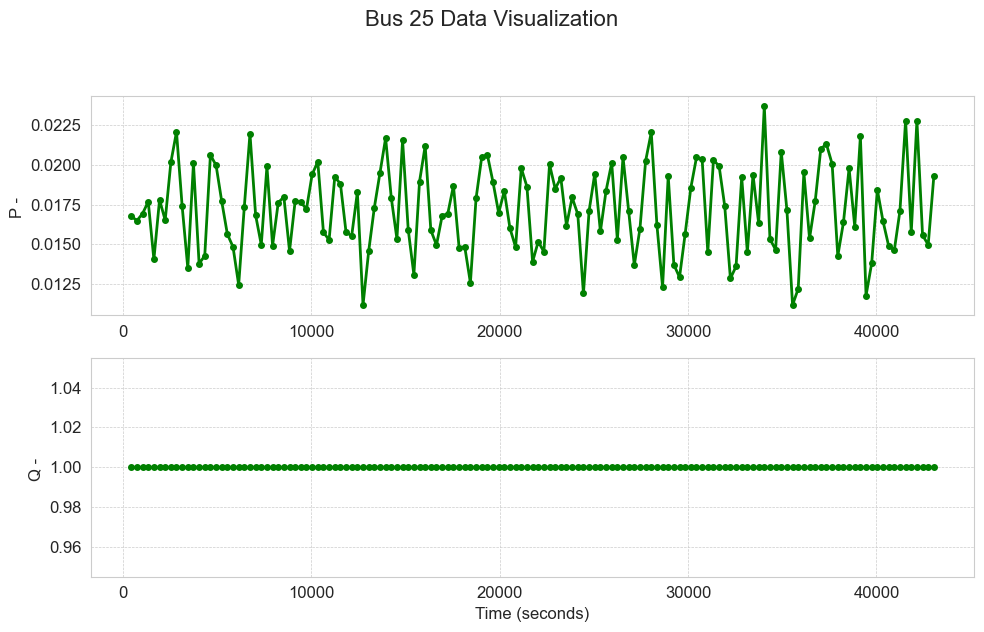

In [8]:
wec_grid.psseObj.plot_bus(bus_num=25, time=[450.0, 43050.0])

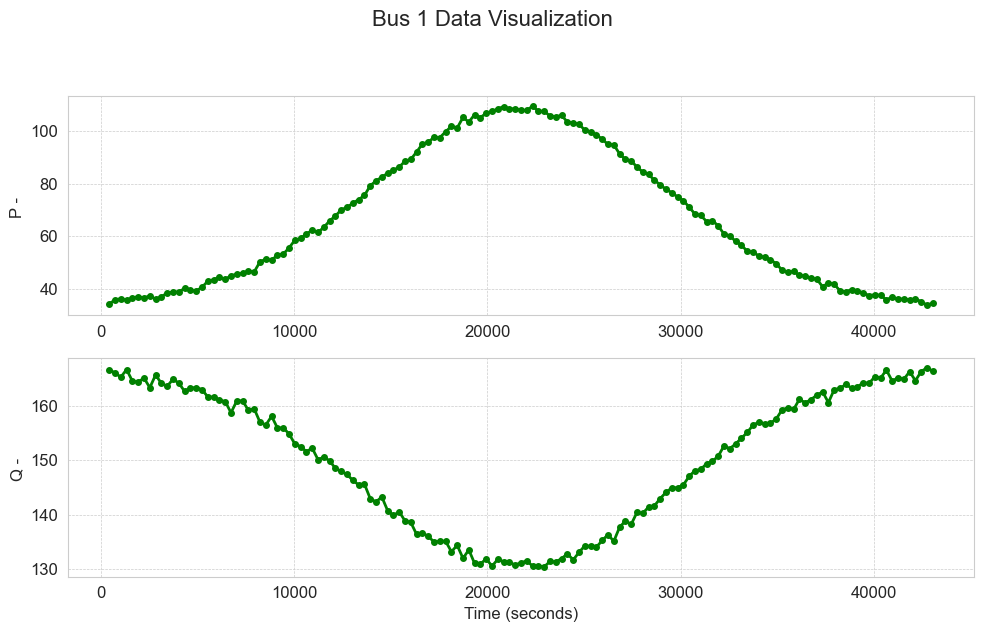

In [9]:
wec_grid.psseObj.plot_bus(bus_num=1, time=[450.0, 43050.0])

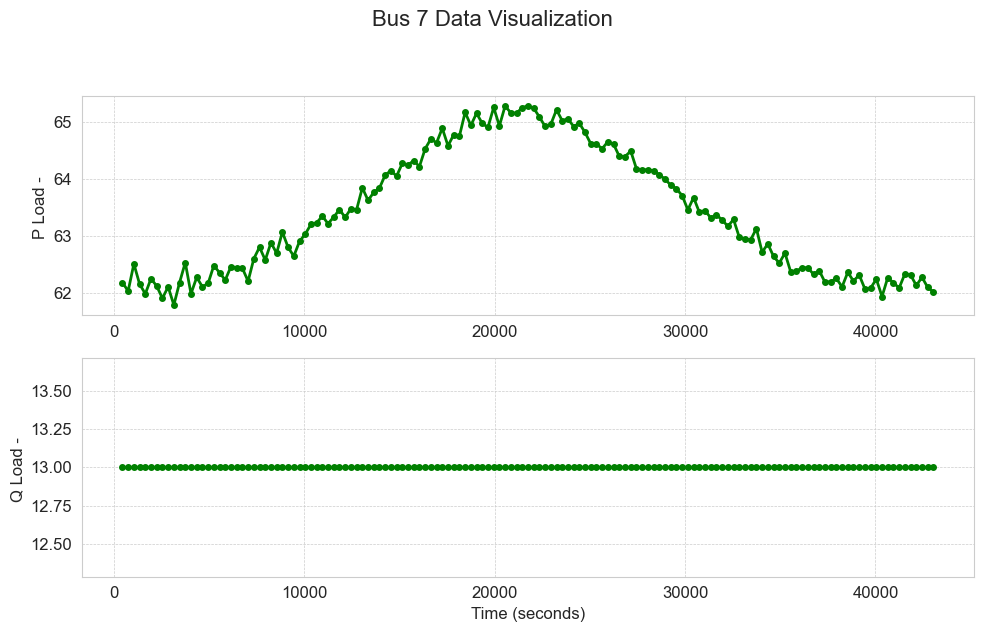

In [10]:
wec_grid.psseObj.plot_bus(bus_num=7, time=[450, 43050.0], arg_1='P Load', arg_2='Q Load')

In [11]:
# save run data
wec_grid.psseObj.load_profiles.to_csv("./softwareX_output/load_profiles.csv")

import pickle

with open("./softwareX_output/psse_history_wec.pkl", "wb") as f:
    pickle.dump(wec_grid.psseObj.history, f)

In [12]:
# Regular run (No WEC) to compare

# save these exact load profiles for later
load_profiles = wec_grid.psseObj.load_profiles
load_profiles

BUS 1      BUS 2      BUS 3      BUS 4      BUS 5      BUS 6  \
0.0        0.0  97.000000  90.000000  74.000000  71.000000  68.000000   
450.0      0.0  96.817012  90.003756  73.982669  70.893019  68.056099   
750.0      0.0  97.344848  90.267243  74.006663  71.301846  67.834915   
1050.0     0.0  96.787995  90.162198  73.987324  70.861843  68.309047   
1350.0     0.0  97.428453  90.312522  74.119199  71.145299  68.303903   
...        ...        ...        ...        ...        ...        ...   
41850.0    0.0  97.097611  90.281298  74.215196  71.257667  68.199649   
42150.0    0.0  97.021947  90.113813  73.952533  71.110999  68.024300   
42450.0    0.0  96.879460  90.038654  74.154338  71.283226  68.091034   
42750.0    0.0  97.008730  89.742579  74.057189  71.033896  67.869297   
43050.0    0.0  97.036376  90.219194  74.014408  71.249133  68.150289   

             BUS 7      BUS 8       BUS 9      BUS 10  ...      BUS 16  \
0.0      62.000000  85.000000  175.000000  100.000000  ...  100.000000   
450.0    62.178062  85.068389  174.987777  100.426899  ...   99.749136   
750.0    62.031927  85.134583  175.228012  100.209559  ...  100.239409   
1050.0   62.507587  85.203015  175.394481   99.879969  ...   99.979738   
1350.0   62.154431  85.066473  175.186103   99.845326  ...   99.815826   
...            ...        ...         ...         ...  ...         ...   
41850.0  62.311720  85.085552  174.924923  100.287705  ...  100.039812   
42150.0  62.129572  85.074151  175.087967  100.196145  ...  100.506816   
42450.0  62.272535  85.082158  175.109612  100.091263  ...   99.984568   
42750.0  62.094087  84.702723  175.120806  100.288030  ...   99.909695   
43050.0  62.014369  85.126766  174.711783   99.916578  ...  100.433308   

         BUS 17      BUS 18     BUS 19     BUS 20  BUS 21  BUS 22  BUS 23  \
0.0         0.0  162.000000  90.000000  65.000000     0.0     0.0     0.0   
450.0       0.0  162.177368  90.045204  65.315851     0.0     0.0     0.0   
750.0       0.0  161.715838  89.860767  65.101749     0.0     0.0     0.0   
1050.0      0.0  162.188242  89.837831  65.178628     0.0     0.0     0.0   
1350.0      0.0  161.962867  89.891512  65.079006     0.0     0.0     0.0   
...         ...         ...        ...        ...     ...     ...     ...   
41850.0     0.0  162.181611  90.062847  65.248738     0.0     0.0     0.0   
42150.0     0.0  162.554505  89.791101  65.156795     0.0     0.0     0.0   
42450.0     0.0  162.429898  89.967564  65.189224     0.0     0.0     0.0   
42750.0     0.0  162.115006  89.885637  65.063457     0.0     0.0     0.0   
43050.0     0.0  162.126127  90.058055  65.160304     0.0     0.0     0.0   

         BUS 24  BUS 25  
0.0         0.0     0.0  
450.0       0.0     0.0  
750.0       0.0     0.0  
1050.0      0.0     0.0  
1350.0      0.0     0.0  
...         ...     ...  
41850.0     0.0     0.0  
42150.0     0.0     0.0  
42450.0     0.0     0.0  
42750.0     0.0     0.0  
43050.0     0.0     0.0  

[144 rows x 25 columns]

In [13]:
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid.initialize_psse("fnsl")
wec_grid.psseObj.dataframe


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 24 records for Bus data
 Starting processing of Load data records
 Finished processing of 16 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 11 records for Generator data
 Starting processing of Branch data records
 Finished processing of 32 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 24 records for 6 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of T

BUS_ID     Bus   BASE        PU     ANGLE      MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  1.192093e-05     3   35.930069   
1        2   BUS 2  138.0  0.997822  0.000181  0.000000e+00     2   67.000000   
2        3   BUS 3  138.0  0.863703  0.187725  1.192093e-05     1         NaN   
3        4   BUS 4  138.0  0.887014 -0.007247  6.664002e-06     1         NaN   
4        5   BUS 5  138.0  0.927217 -0.004004  0.000000e+00     1         NaN   
5        6   BUS 6  138.0  0.907952  0.006838  6.365779e-06     1         NaN   
6        7   BUS 7  138.0  0.796234 -0.010124  0.000000e+00     2   64.000000   
7        8   BUS 8  230.0  0.805368 -0.015157  1.343172e-06     1         NaN   
8        9   BUS 9  138.0  0.834940  0.087076  6.365779e-06     1         NaN   
9       10  BUS 10  138.0  0.881702  0.064990  2.980232e-06     1         NaN   
10      11  BUS 11  230.0  0.836073  0.220619  0.000000e+00     1         NaN   
11      12  BUS 12  230.0  0.839763  0.205660  2.980232e-06     1         NaN   
12      13  BUS 13  230.0  0.836927  0.269663  0.000000e+00     2  200.000000   
13      14  BUS 14  230.0  0.836423  0.327386  1.192093e-05     2    0.000000   
14      15  BUS 15  230.0  0.885209  0.579676  2.980232e-06     2  274.000000   
15      16  BUS 16  230.0  0.862146  0.472709  1.812804e-05     2  245.000000   
16      17  BUS 17  230.0  0.895736  0.559572  5.960464e-06     1         NaN   
17      18  BUS 18  230.0  0.901057  0.591654  0.000000e+00     2  144.000000   
18      19  BUS 19  230.0  0.851835  0.415460  7.450581e-07     1         NaN   
19      20  BUS 20  230.0  0.849352  0.389755  6.006850e-06     1         NaN   
20      21  BUS 21  230.0  0.911253  0.622349  2.402740e-05     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.654534  1.192093e-05     2  150.000000   
22      23  BUS 23  230.0  0.849713  0.385360  7.450581e-07     2  200.000000   
23      24  BUS 24  230.0  0.854969  0.433070  0.000000e+00     1         NaN   

         Q Gen  P Load     Q Load           P           Q        ΔP  \
0   180.488586     NaN        NaN   35.930069  180.488586  0.000000   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000000   
2          NaN    90.0  19.000000  -90.000000  -19.000000 -0.000012   
3          NaN    74.0  15.000001  -74.000000  -15.000001  0.000003   
4          NaN    71.0  14.000000  -71.000000  -14.000000  0.000000   
5          NaN    68.0  14.000000  -68.000000  -14.000000 -0.000002   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000000   
7          NaN    85.0  18.000000  -85.000000  -18.000000 -0.000001   
8          NaN   175.0  36.000000 -175.000000  -36.000000 -0.000006   
9          NaN   100.0  23.000000 -100.000000  -23.000000  0.000003   
10         NaN     NaN        NaN         NaN         NaN  0.000000   
11         NaN     NaN        NaN         NaN         NaN  0.000000   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000000   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000012   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000000   
15    0.000000   100.0  20.000000  145.000000  -20.000000 -0.000018   
16         NaN     NaN        NaN         NaN         NaN  0.000000   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000000   
18         NaN    90.0  18.000000  -90.000000  -18.000000  0.000000   
19         NaN    65.0  13.000000  -65.000000  -13.000000  0.000006   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000024   
21  199.455856     NaN        NaN  150.000000  199.455856  0.000000   
22    0.000000     NaN        NaN  200.000000    0.000000  0.000000   
23         NaN     NaN        NaN         NaN         NaN  0.000000   

              ΔQ       M_Angle     M_Mag  
0  -1.192093e-05  1.192093e-05 -1.570796  
1   0.000000e+00  0.000000e+00  0.000000  
2   0.000000e+00  1.192093e-05  3.141593  
3  -5.960464e-06  6.664002e-06

In [14]:
wec_grid.psseObj.load_profiles = load_profiles

In [15]:
import sqlite3
import pandas as pd

# Define database path
DB_PATH = "../WecGrid/database_handler/WEC-GRID.db"  # Ensure correct relative path

# Define WEC ID
ID = 11  

# Connect to the database
conn = sqlite3.connect(DB_PATH)

# Query to select only the 'time' column
data_query = f"SELECT time FROM WEC_output_{ID}"

# Execute the query and load into a DataFrame
time_dataframe = pd.read_sql_query(data_query, conn)

# Convert time column to list
time_data = time_dataframe['time'].tolist()

# Close the database connection
conn.close()

In [16]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0, time=time_data)


 No power flow data changed for load "1" at bus 2 [2           138.00]

 No power flow data changed for load "1" at bus 3 [3           138.00]

 No power flow data changed for load "1" at bus 4 [4           138.00]

 No power flow data changed for load "1" at bus 5 [5           138.00]

 No power flow data changed for load "1" at bus 6 [6           138.00]

 No power flow data changed for load "1" at bus 7 [7           138.00]

 No power flow data changed for load "1" at bus 8 [8           230.00]

 No power flow data changed for load "1" at bus 9 [9           138.00]

 No power flow data changed for load "1" at bus 10 [10          138.00]

 No power flow data changed for load "1" at bus 13 [13          230.00]

 No power flow data changed for load "1" at bus 14 [14          230.00]

 No power flow data changed for load "1" at bus 15 [15          230.00]

 No power flow data changed for load "1" at bus 16 [16          230.00]

 No power flow data changed for load "1" at bus 18 [18    

time: 3150.0 - error code: 0

 Power flow data changed for load "1" at bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    97.3468         97.6428      PL

 Power flow data changed for load "1" at bus 3 [3           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    90.0413         90.3301      PL

 Power flow data changed for load "1" at bus 4 [4           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    74.2634         74.1664      PL

 Power flow data changed for load "1" at bus 5 [5           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    71.1711         71.2882      PL

 Power flow data changed for load "1" at bus 6 [6           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    68.2031         68.1075      PL

 Power flow data changed for load "1" at bus 7 [7           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    61.7859         62.1796      PL

 Power flow data changed for load "1" at bus 8 [8           230.00]:
 X--ORI

In [17]:
# save run data

with open("./softwareX_output/psse_history_no_wec.pkl", "wb") as f:
    pickle.dump(wec_grid.psseObj.history, f)

In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

# Load history
with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)


In [27]:
no_wec_history[-1].columns

Index(['BUS_ID', 'Bus', 'BASE', 'PU', 'ANGLE', 'MISMATCH', 'Type', 'P Gen',
       'Q Gen', 'P Load', 'Q Load', 'P', 'Q', 'ΔP', 'ΔQ', 'M_Angle', 'M_Mag'],
      dtype='object')

In [20]:
wec_history

{-1:     BUS_ID     Bus   BASE        PU     ANGLE  MISMATCH  Type       P Gen  \
 0        1   BUS 1  138.0  1.000000  0.000000  0.000003     3   33.938225   
 1        2   BUS 2  138.0  0.997914  0.000150  0.000027     2   67.000000   
 2        3   BUS 3  138.0  0.869158  0.184816  0.000223     1         NaN   
 3        4   BUS 4  138.0  0.891616 -0.007560  0.000095     1         NaN   
 4        5   BUS 5  138.0  0.931030 -0.004400  0.000069     1         NaN   
 5        6   BUS 6  138.0  0.914745  0.006218  0.000218     1         NaN   
 6        7   BUS 7  138.0  0.819692 -0.013867  0.000588     2   64.000000   
 7        8   BUS 8  230.0  0.822576 -0.016730  0.001430     1         NaN   
 8        9   BUS 9  138.0  0.843033  0.085111  0.000498     1         NaN   
 9       10  BUS 10  138.0  0.889281  0.063249  0.000292     1         NaN   
 10      11  BUS 11  230.0  0.843570  0.216455  0.000067     1         NaN   
 11      12  BUS 12  230.0  0.847512  0.201690  0.000021    

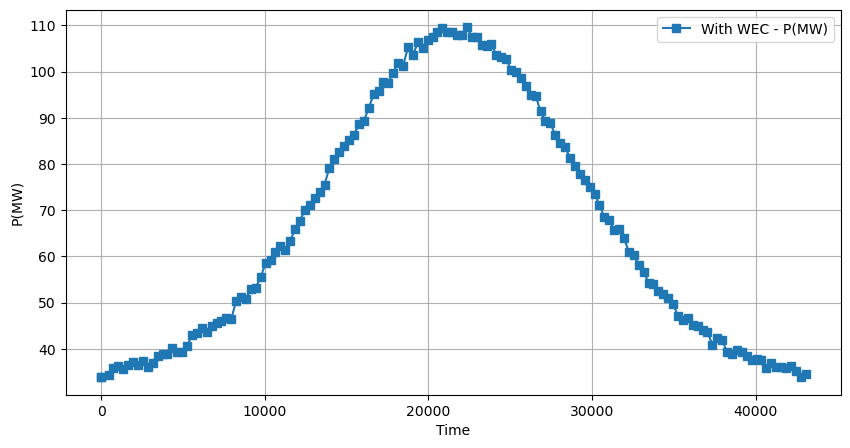

In [6]:
# review bus 1 
# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 1

# pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
#plt.plot(time_steps, pgen_no_wec, label="No WEC - P(MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P(MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P(MW)")
#plt.title(f"Bus {bus_id} Active Power Over Time")
plt.legend()
plt.grid()
plt.show()

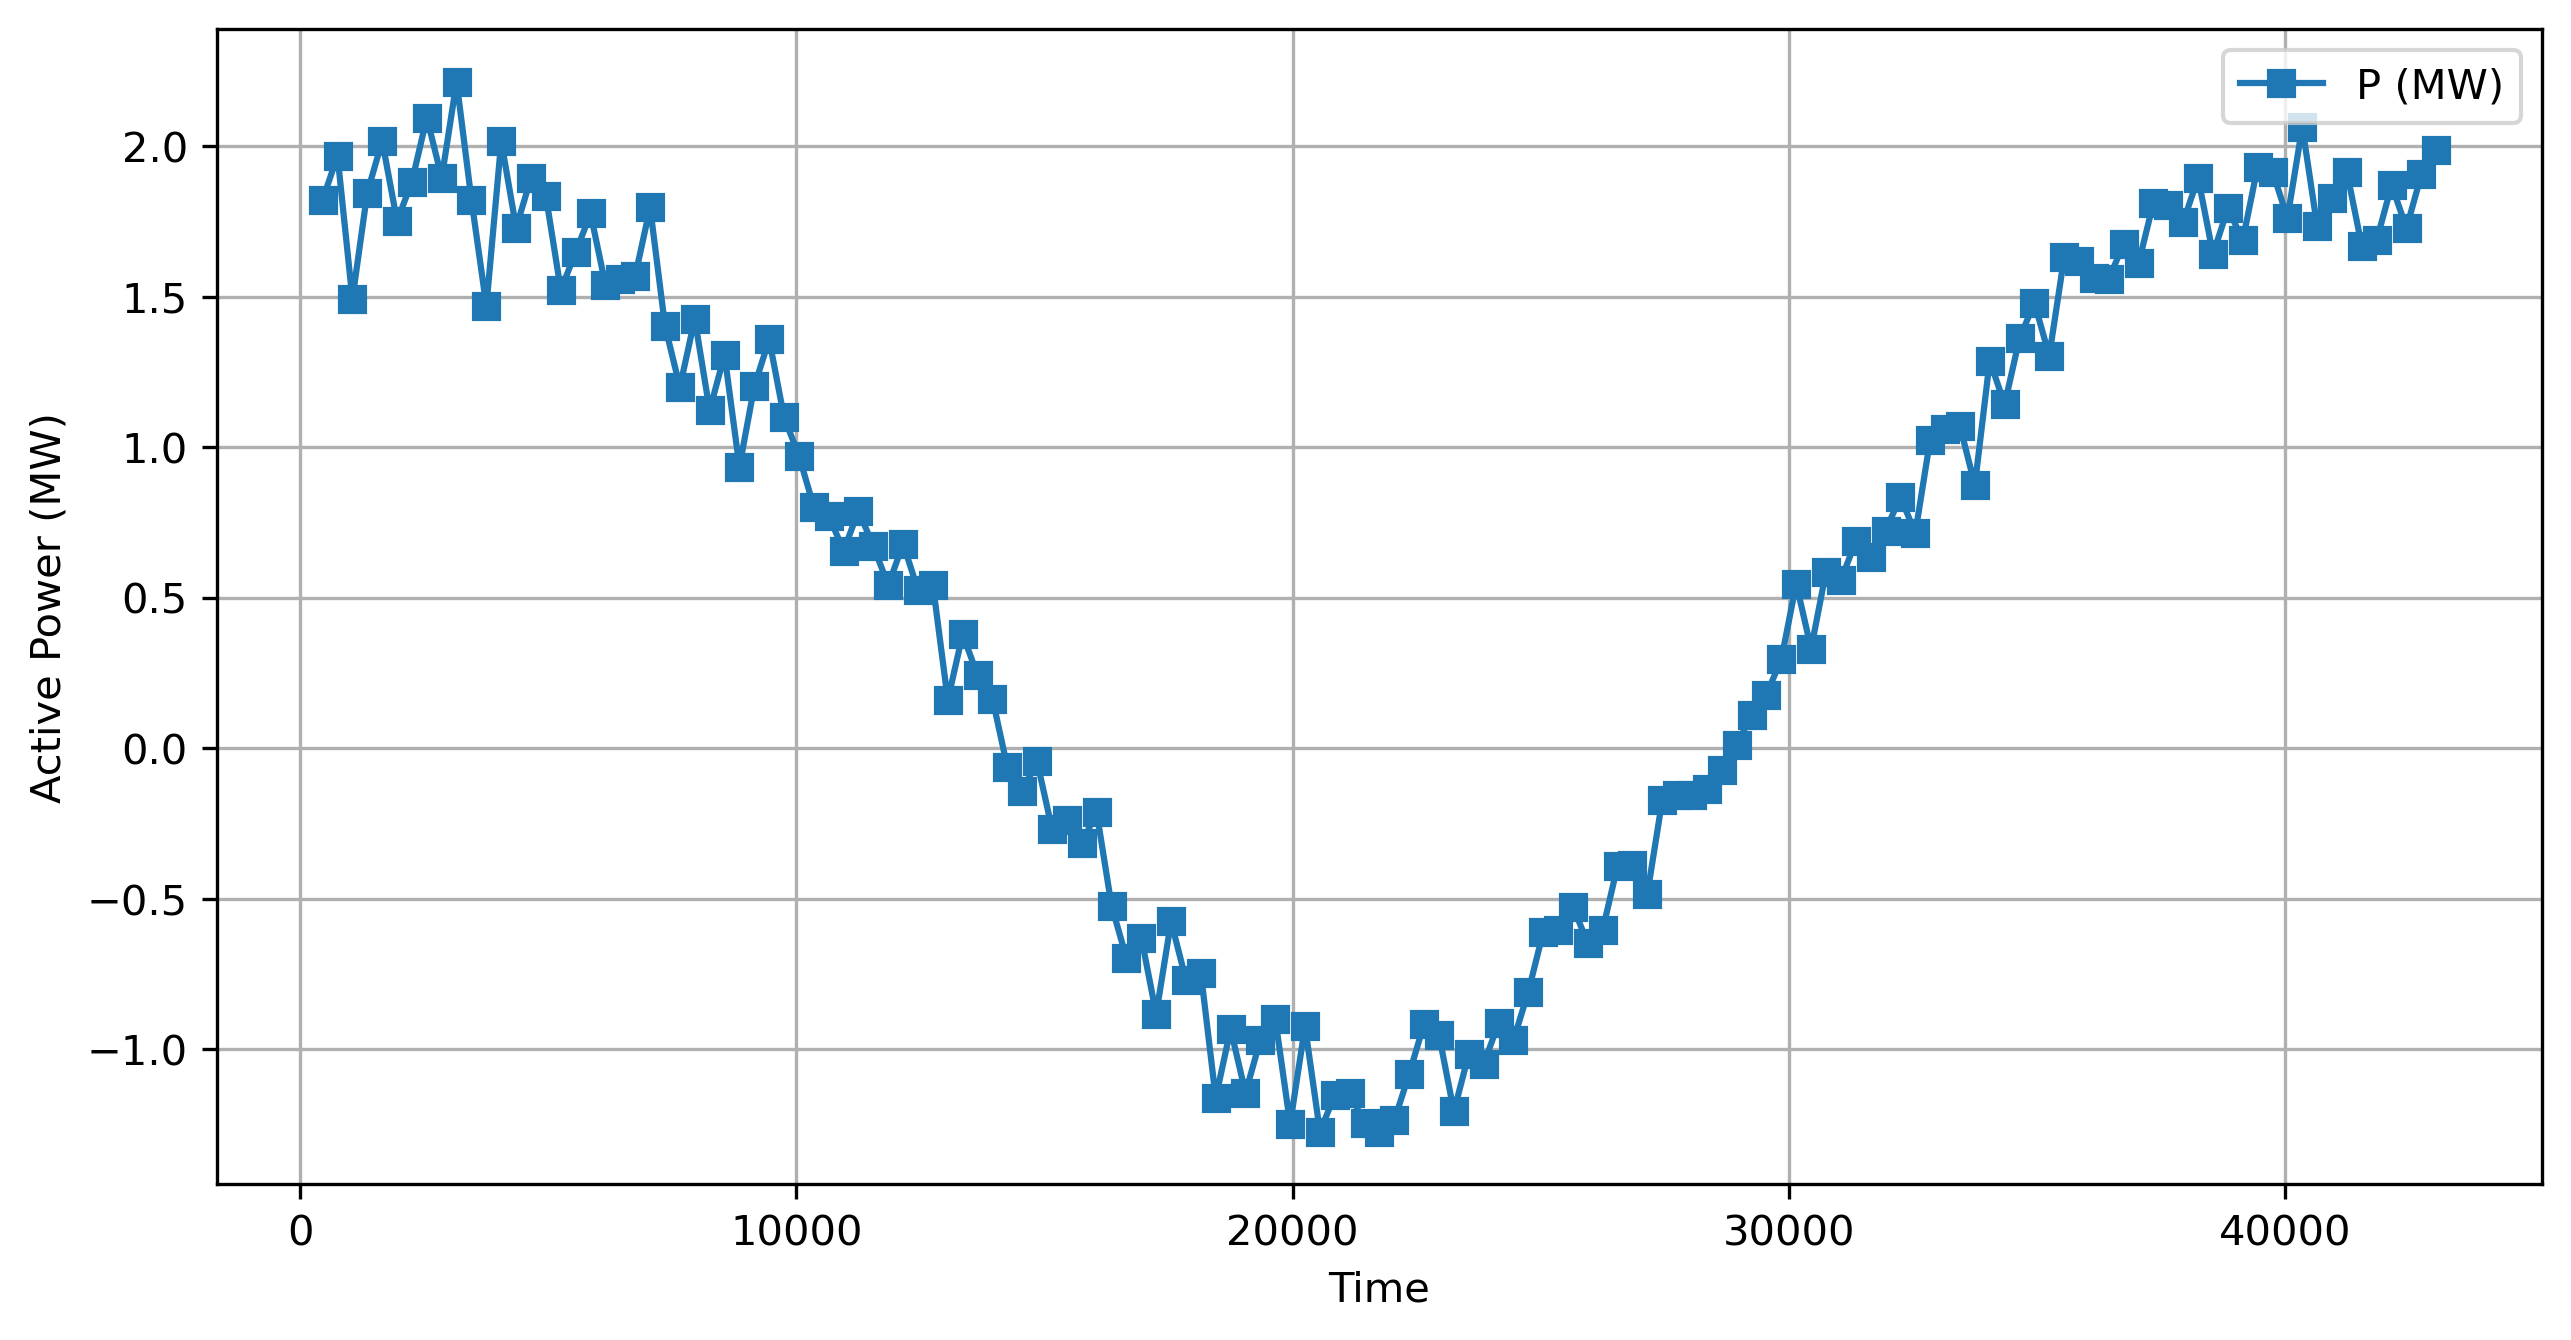

In [13]:
import matplotlib.pyplot as plt

# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 7
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

pgen_wec = pgen_wec[2:]
time_steps = time_steps[2:]  # Also slice time_steps to match

# Create plot
plt.figure(figsize=(10, 5), dpi=300)  # Increase DPI for better resolution
plt.plot(time_steps, pgen_wec, label="P (MW)", linestyle="-", marker="s")

# Labels and formatting
plt.xlabel("Time")
plt.ylabel("Active Power (MW)")
plt.legend()
plt.grid()

# Save as high-res PNG and vector PDF
plt.savefig("bus_7_pgen.png", dpi=300, bbox_inches="tight")  # High-res raster
#plt.savefig("bus_1_pgen.pdf", bbox_inches="tight")  # High-quality vector

plt.show()

In [7]:
import pandas as pd
import numpy as np  # Import NumPay for NaN handling

# Extract time and load data
time_steps = list(no_wec_history.keys())

bus_id = 25  # Define the bus ID
parameter = "P Gen"  # Ensure correct capitalization

values_a = []  # Initialize empty lists
values_b = []

# Handle missing data with NaN instead of None
try:
    values_a = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
except Exception as e:
    print(f"Data not available for 'No WEC' - {e}")

try:
    values_b = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
except Exception as e:
    print(f"Data not available for 'With WEC' - {e}")

# Ensure both lists have the same length (fill with NaN if missing)
if not values_a:
    values_a = [np.nan] * len(time_steps)
if not values_b:
    values_b = [np.nan] * len(time_steps)

# Create a DataFrame
df = pd.DataFrame({
    "Time Step": time_steps,
    f"{parameter} (No WEC)": values_a,
    f"{parameter} (With WEC)": values_b
})

# Format parameter for file naming (replace spaces with underscores)
parameter = parameter.replace(" ", "_")

# Save to CSV
csv_filename = f"bus{bus_id}_{parameter}.csv"
#df.to_csv(csv_filename, index=False)
df.to_csv(csv_filename, index=False, na_rep="NaN")
print(f"CSV file saved as: {csv_filename}")

Data not available for 'No WEC' - 25
CSV file saved as: bus25_P_Gen.csv


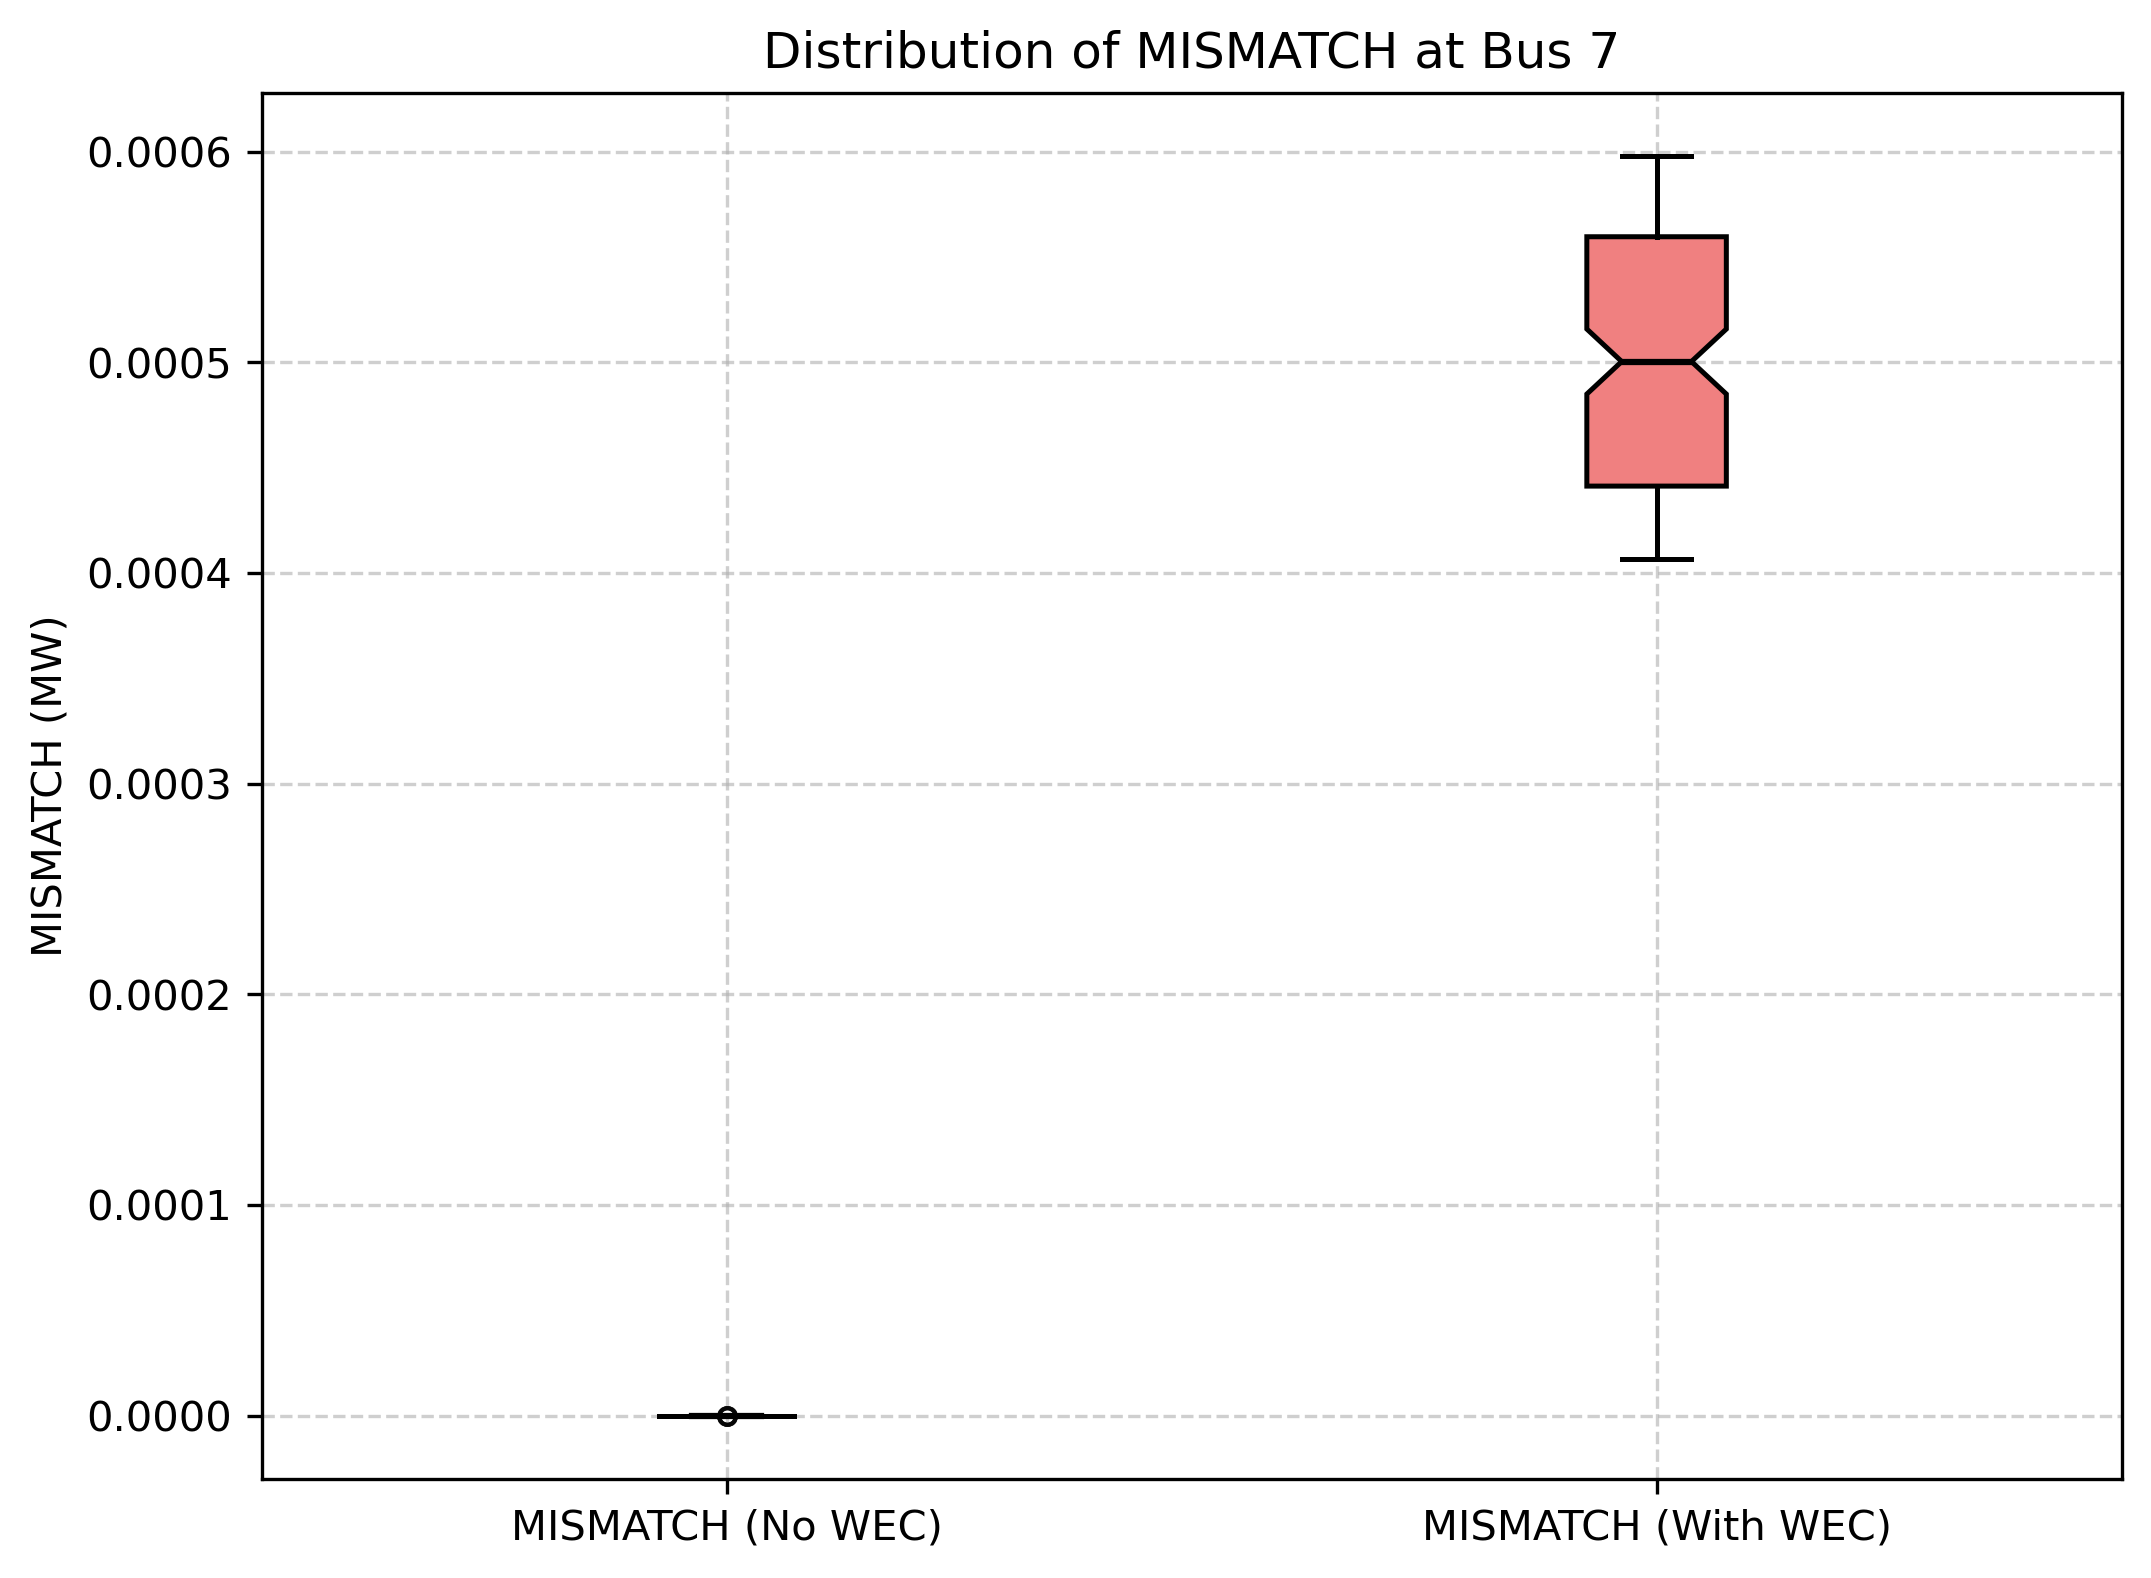

In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history from pickle files
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)

# Define bus ID and parameter
bus_id = 7
parameter = "MISMATCH"

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract mismatch data for the bus
no_wec_values = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
wec_values = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]

# Create DataFrame
df = pd.DataFrame({
    f"{parameter} (No WEC)": no_wec_values,
    f"{parameter} (With WEC)": wec_values
})

# High-res box plot
plt.figure(figsize=(8, 6), dpi=300)
box = plt.boxplot(
    [df[f"{parameter} (No WEC)"], df[f"{parameter} (With WEC)"]],
    labels=[f"{parameter} (No WEC)", f"{parameter} (With WEC)"],
    patch_artist=True,
    notch=True,  # Add notch to show confidence interval for median
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black", linewidth=1.2),
    capprops=dict(color="black", linewidth=1.2),
    flierprops=dict(marker='o', color="red", markersize=4, alpha=0.7),  # Outliers
    boxprops=dict(linewidth=1.2)
)

# Custom colors for boxes
colors = ["lightblue", "lightcoral"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Labels and formatting
plt.ylabel(f"{parameter} (MW)")
plt.title(f"Distribution of {parameter} at Bus {bus_id}")
plt.grid(True, linestyle="--", alpha=0.6)

# Save high-res outputs
plt.savefig("bus_7_mismatch_boxplot.png", dpi=300, bbox_inches="tight")  # High-res raster
plt.savefig("bus_7_mismatch_boxplot.pdf", bbox_inches="tight")  # Vector format for LaTeX

plt.show()

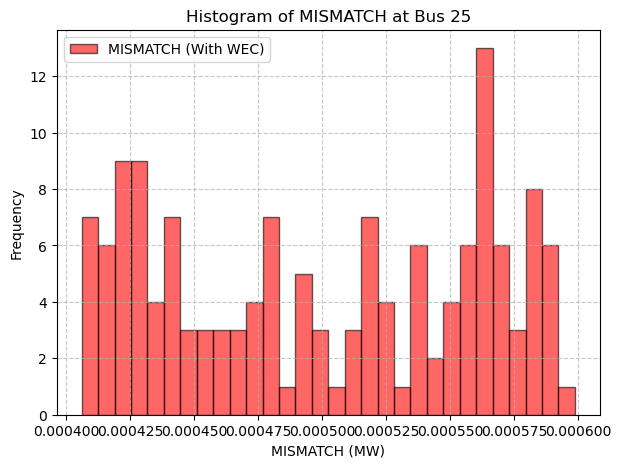

In [25]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history from pickle files
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)

# Define bus ID and parameter
bus_id = 25
parameter = "MISMATCH"

# Extract time step#s
time_steps = list(no_wec_history.keys())

# Extract mismatch data for the bus
#no_wec_values = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
wec_values = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]

# Create Histogram
plt.figure(figsize=(7, 5))
#plt.hist(no_wec_values, bins=30, alpha=0.6, color='blue', label=f"{parameter} (No WEC)", edgecolor='black')
plt.hist(wec_values, bins=30, alpha=0.6, color='red', label=f"{parameter} (With WEC)", edgecolor='black')

# Labels and title
plt.xlabel(f"{parameter} (MW)")
plt.ylabel("Frequency")
plt.title(f"Histogram of {parameter} at Bus {bus_id}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()

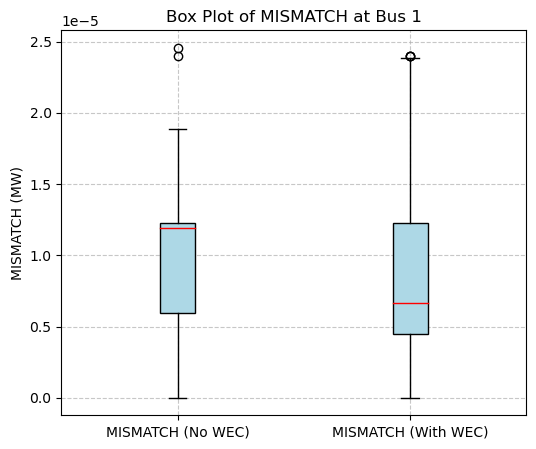

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bus_id = 1# Define the bus ID
parameter = "MISMATCH"
csv_filename = f"bus{bus_id}_{parameter}.csv"

# Read the CSV file
df = pd.read_csv(csv_filename)

# Extract data columns
no_wec = df[f"{parameter} (No WEC)"]
with_wec = df[f"{parameter} (With WEC)"]

# Create box plot
plt.figure(figsize=(6, 5))
plt.boxplot([no_wec, with_wec], labels=[f"{parameter} (No WEC)", f"{parameter} (With WEC)"],
            patch_artist=True, boxprops=dict(facecolor="lightblue"),
            medianprops=dict(color="red"), whiskerprops=dict(color="black"),
            capprops=dict(color="black"))

# Labels and title
plt.ylabel(f"{parameter} (MW)")
plt.title(f"Box Plot of {parameter} at Bus {bus_id}")

# Show plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [ ]:
a

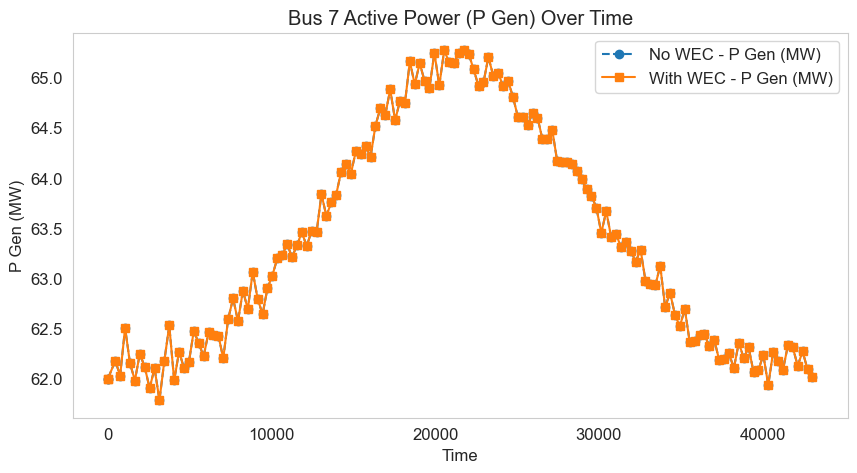

In [22]:
# review bus 7 
# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 7

pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P Load"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P Load"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pgen_no_wec, label="No WEC - P Gen (MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P Gen (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P Gen (MW)")
plt.title(f"Bus {bus_id} Active Power (P Gen) Over Time")
plt.legend()
plt.grid()
plt.show()

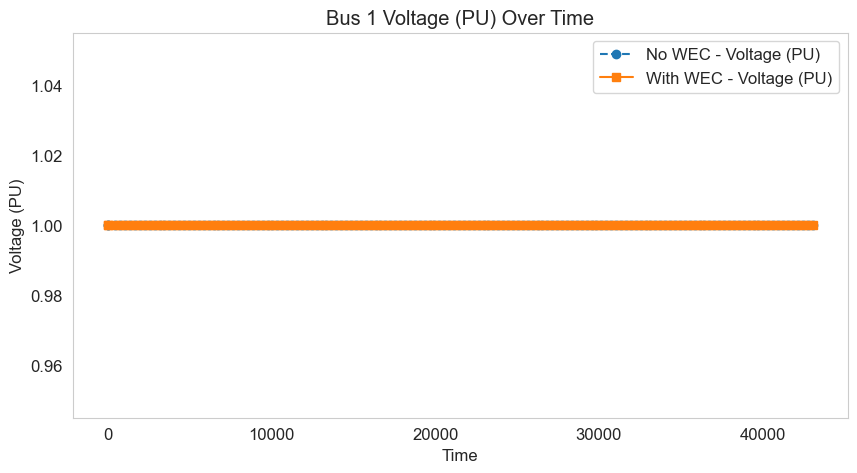

In [23]:

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract PU and ΔP (Power Mismatch) for Bus 1 over time
bus_id = 1

pu_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "PU"] for t in time_steps]
pu_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "PU"] for t in time_steps]

# Plot Voltage (PU)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pu_no_wec, label="No WEC - Voltage (PU)", linestyle="--", marker="o")
plt.plot(time_steps, pu_wec, label="With WEC - Voltage (PU)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("Voltage (PU)")
plt.title(f"Bus {bus_id} Voltage (PU) Over Time")
plt.legend()
plt.grid()
plt.show()


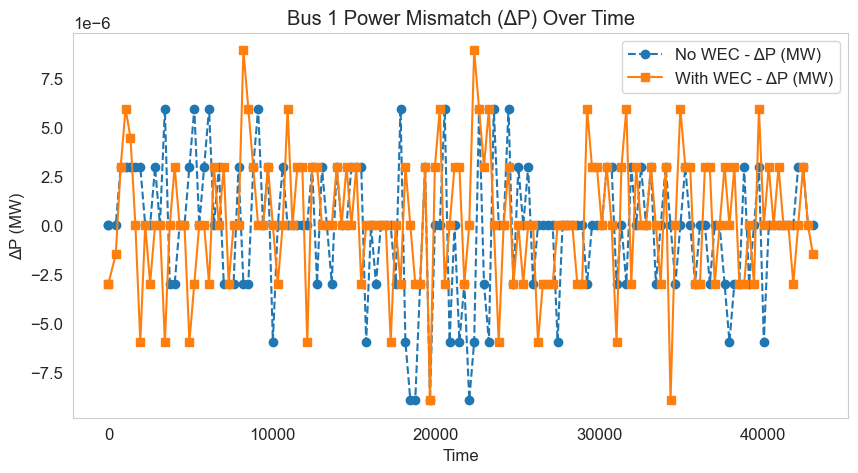

In [24]:

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract PU and ΔP (Power Mismatch) for Bus 1 over time
bus_id = 1

delta_p_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "ΔP"] for t in time_steps]
delta_p_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "ΔP"] for t in time_steps]

# Plot Power Mismatch (ΔP)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, delta_p_no_wec, label="No WEC - ΔP (MW)", linestyle="--", marker="o")
plt.plot(time_steps, delta_p_wec, label="With WEC - ΔP (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("ΔP (MW)")
plt.title(f"Bus {bus_id} Power Mismatch (ΔP) Over Time")
plt.legend()
plt.grid()
plt.show()

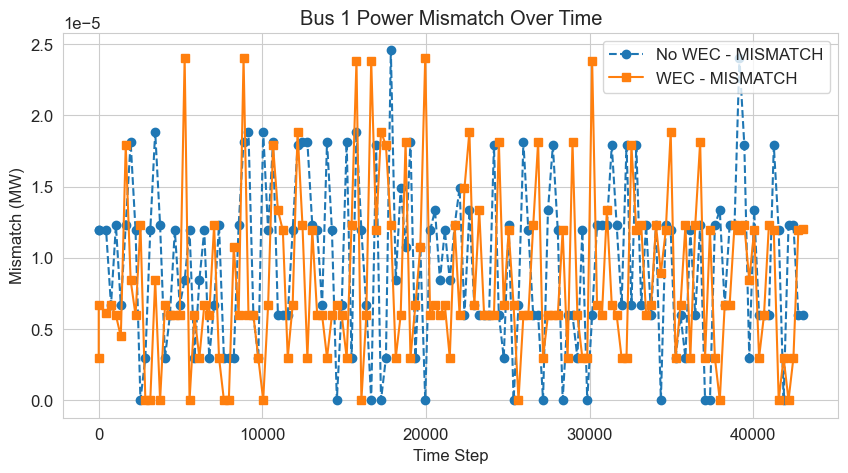

In [26]:
# Extract time steps (keys of history dictionary)
times = list(no_wec_history.keys())  # Assuming history is a dictionary with time as keys

# Extract mismatch values for Bus 1 over time
mismatch_no_wec = [no_wec_history[t].loc[no_wec_history[t]["Bus"] == "BUS 1", "MISMATCH"].values[0] for t in times]
mismatch_wec = [wec_history[t].loc[wec_history[t]["Bus"] == "BUS 1", "MISMATCH"].values[0] for t in times]

# Plot mismatch over time
plt.figure(figsize=(10, 5))
plt.plot(times, mismatch_no_wec, label="No WEC - MISMATCH", linestyle="--", marker="o")
plt.plot(times, mismatch_wec, label="WEC - MISMATCH", linestyle="-", marker="s")

plt.xlabel("Time Step")
plt.ylabel("Mismatch (MW)")
plt.title("Bus 1 Power Mismatch Over Time")
plt.legend()
plt.grid(True)
plt.show()

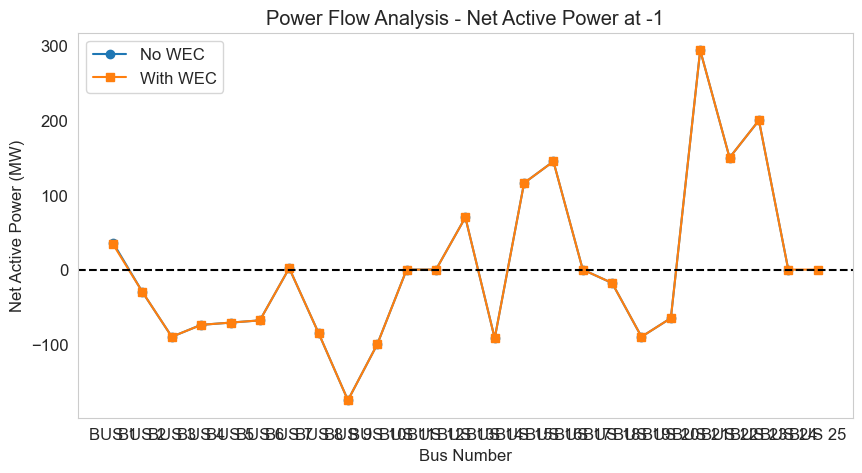

In [28]:

# Select a time step (e.g., first time step)
time_step = list(no_wec_history.keys())[0]  # Get first available timestamp
df_no_wec = no_wec_history[time_step]  # Extract DataFrame for no-WEC case
df_wec = wec_history[time_step]  # Extract DataFrame for WEC case

# Ensure numerical columns have no NaN values
df_no_wec.fillna(0, inplace=True)
df_wec.fillna(0, inplace=True)

# Compute Net Power Injection
df_no_wec["P_net"] = df_no_wec["P Gen"] - df_no_wec["P Load"]
df_wec["P_net"] = df_wec["P Gen"] - df_wec["P Load"]

# Plot Comparison of Net Active Power (P)
plt.figure(figsize=(10, 5))
plt.plot(df_no_wec["Bus"], df_no_wec["P_net"], label="No WEC", marker="o")
plt.plot(df_wec["Bus"], df_wec["P_net"], label="With WEC", marker="s")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Bus Number")
plt.ylabel("Net Active Power (MW)")
plt.title(f"Power Flow Analysis - Net Active Power at {time_step}")
plt.legend()
plt.grid()
plt.show()

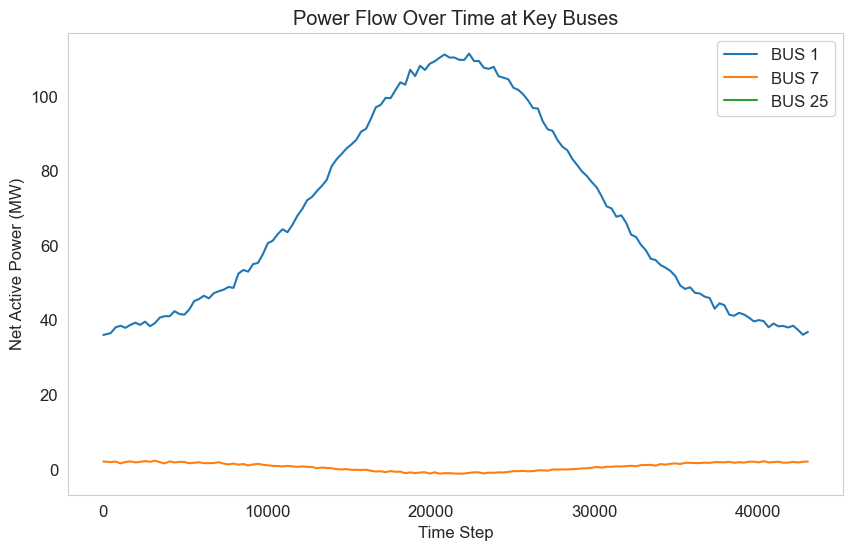

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert history dict to a DataFrame for time-series analysis
time_series_data = []

for t, df in no_wec_history.items():
    df["Time"] = t  # Add time column
    df["P_net"] = df["P Gen"].fillna(0) - df["P Load"].fillna(0)
    time_series_data.append(df[["Time", "Bus", "P_net"]])

# Combine all time steps
df_time_series = pd.concat(time_series_data)

# Pivot for heatmap (Time vs Bus)
heatmap_data = df_time_series.pivot(index="Time", columns="Bus", values="P_net")

# Sort buses numerically instead of lexicographically
heatmap_data = heatmap_data[sorted(heatmap_data.columns, key=lambda x: int(x.split()[-1]))]

# # Replot
# plt.figure(figsize=(12, 6))
# sns.heatmap(heatmap_data, cmap="coolwarm", center=0, annot=False)
# plt.xlabel("Bus Number (Sorted)")
# plt.ylabel("Time Step")
# plt.title("Net Active Power (P) Over Time for Each Bus (Sorted)")
# plt.show()

key_buses = ["BUS 1", "BUS 7", "BUS 25"]  # Pick key buses to analyze
df_selected = df_time_series[df_time_series["Bus"].isin(key_buses)]

# Line plot for key buses
plt.figure(figsize=(10, 6))
for bus in key_buses:
    df_bus = df_selected[df_selected["Bus"] == bus]
    plt.plot(df_bus["Time"], df_bus["P_net"], label=f"{bus}")

plt.xlabel("Time Step")
plt.ylabel("Net Active Power (MW)")
plt.title("Power Flow Over Time at Key Buses")
plt.legend()
plt.grid()
plt.show()

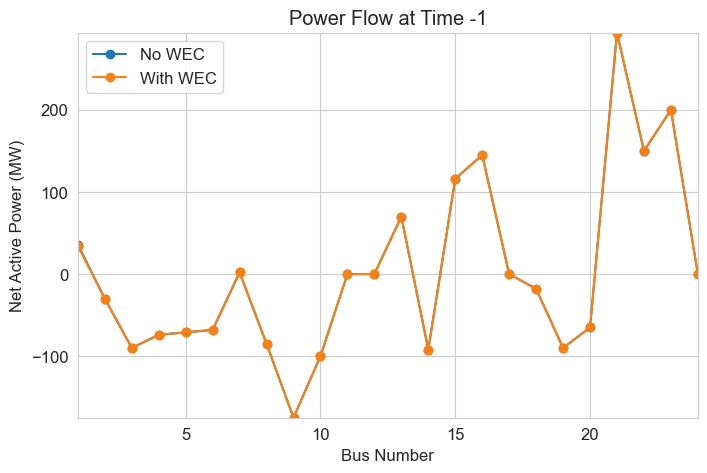

In [37]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

fig, ax = plt.subplots(figsize=(8, 5))
lines = []

# Initialize plot
for label in ["No WEC", "With WEC"]:
    line, = ax.plot([], [], marker="o", linestyle="-", label=label)
    lines.append(line)

ax.set_xlabel("Bus Number")
ax.set_ylabel("Net Active Power (MW)")
ax.set_title("Power Flow Evolution Over Time")
ax.legend()

# Animation function
def update(frame):
    time_step = list(no_wec_history.keys())[frame]
    
    df_no_wec = no_wec_history[time_step].copy()
    df_wec = wec_history[time_step].copy()

    df_no_wec["P_net"] = df_no_wec.get("P Gen", pd.Series(0)) - df_no_wec.get("P Load", pd.Series(0))
    df_wec["P_net"] = df_wec.get("P Gen", pd.Series(0)) - df_wec.get("P Load", pd.Series(0))

    # Convert bus numbers if necessary
    df_no_wec["Bus"] = df_no_wec["Bus"].str.extract(r'(\d+)').astype(float)
    df_wec["Bus"] = df_wec["Bus"].str.extract(r'(\d+)').astype(float)

    df_no_wec.sort_values("Bus", inplace=True)
    df_wec.sort_values("Bus", inplace=True)

    lines[0].set_data(df_no_wec["Bus"], df_no_wec["P_net"])
    lines[1].set_data(df_wec["Bus"], df_wec["P_net"])

    ax.set_xlim(df_no_wec["Bus"].min(), df_no_wec["Bus"].max())
    ax.set_ylim(min(df_no_wec["P_net"].min(), df_wec["P_net"].min()),
                max(df_no_wec["P_net"].max(), df_wec["P_net"].max()))

    ax.set_title(f"Power Flow at Time {time_step}")
    return lines

# Store animation in a persistent variable
ani = animation.FuncAnimation(fig, update, frames=len(no_wec_history), interval=500, blit=False)

# Keep reference to avoid garbage collection


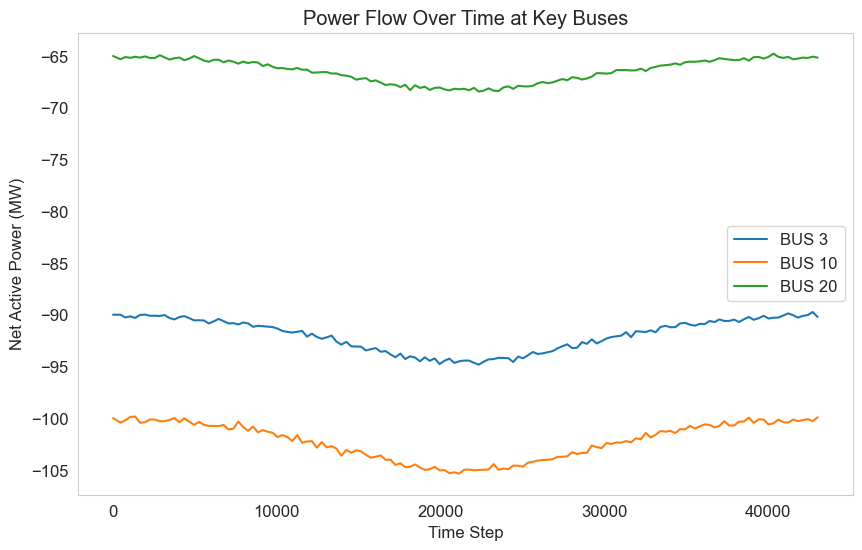

In [31]:
selected_buses = ["BUS 3", "BUS 10", "BUS 20"]  # Pick key buses
df_selected = df_time_series[df_time_series["Bus"].isin(selected_buses)]

# Plot each bus separately
plt.figure(figsize=(10, 6))
for bus in selected_buses:
    df_bus = df_selected[df_selected["Bus"] == bus]
    plt.plot(df_bus["Time"], df_bus["P_net"], label=f"{bus}")

plt.xlabel("Time Step")
plt.ylabel("Net Active Power (MW)")
plt.title("Power Flow Over Time at Key Buses")
plt.legend()
plt.grid()
plt.show()

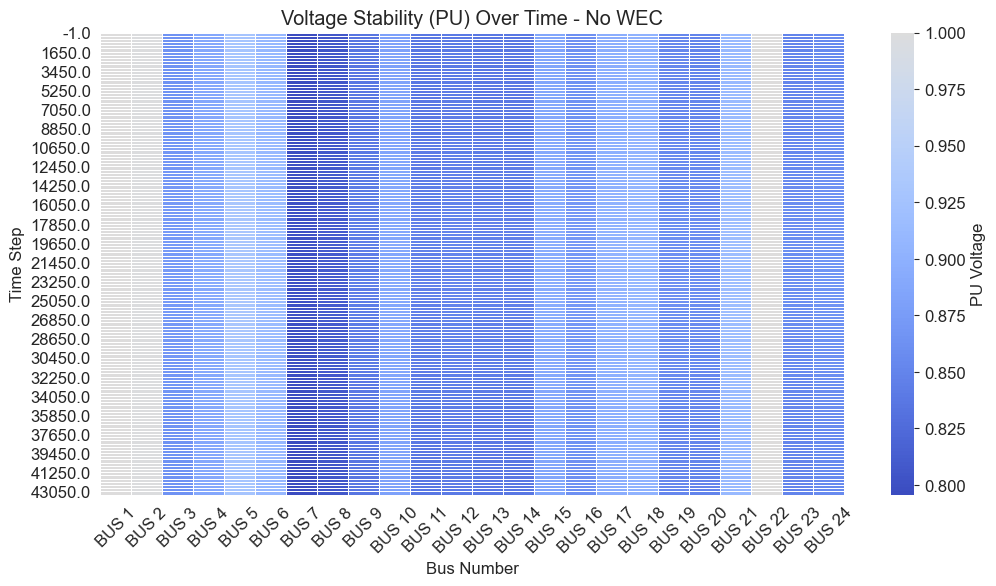

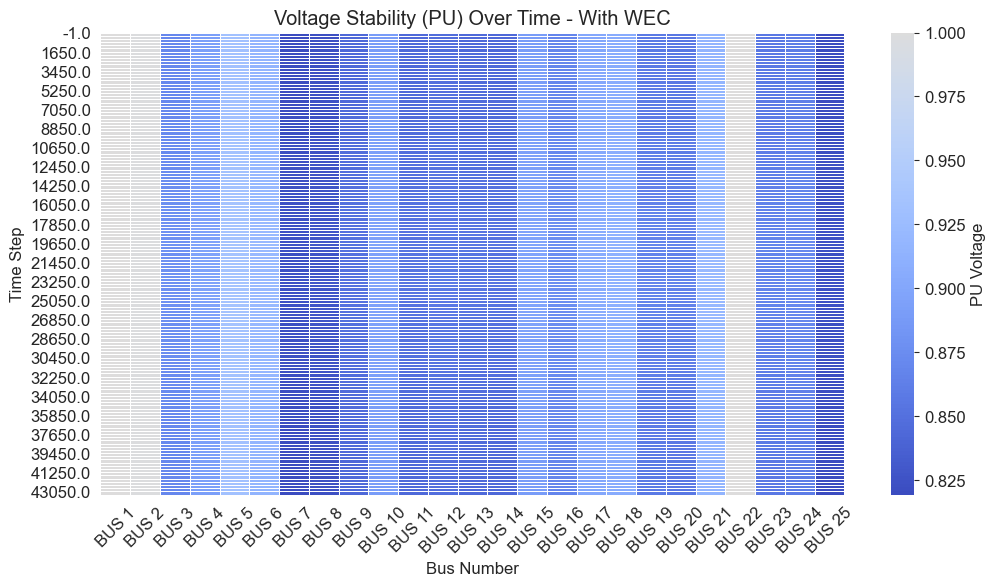

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the time-history dictionary to a DataFrame format
def extract_pu_data(history):
    pu_data = {time: df.set_index("Bus")["PU"] for time, df in history.items()}
    return pd.DataFrame(pu_data).T  # Time as rows, Buses as columns

# Extract PU values for No WEC and With WEC cases
pu_no_wec = extract_pu_data(no_wec_history)
pu_wec = extract_pu_data(wec_history)

# Plot heatmap for No WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(pu_no_wec, cmap="coolwarm", center=1.0, linewidths=0.5, cbar_kws={'label': 'PU Voltage'})
plt.title("Voltage Stability (PU) Over Time - No WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for With WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(pu_wec, cmap="coolwarm", center=1.0, linewidths=0.5, cbar_kws={'label': 'PU Voltage'})
plt.title("Voltage Stability (PU) Over Time - With WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

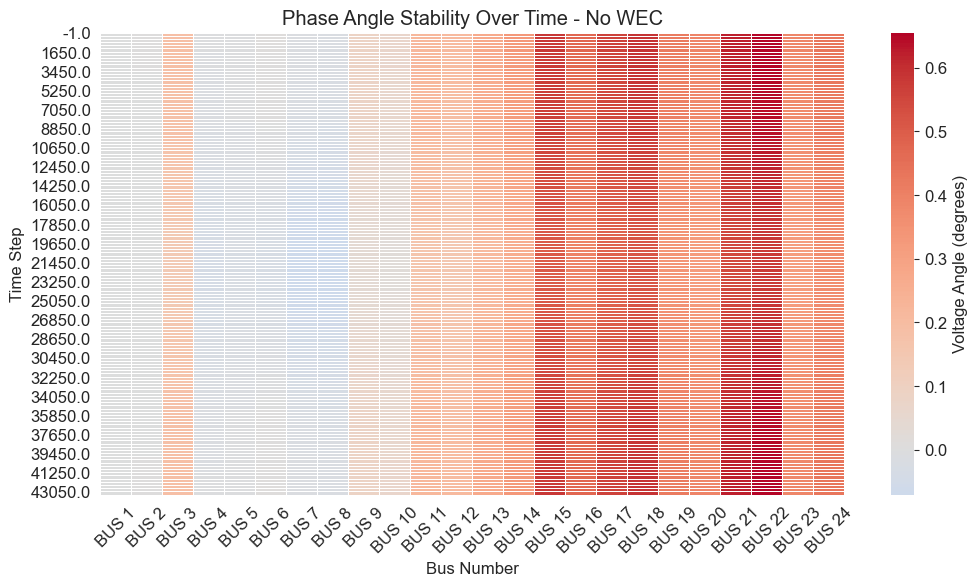

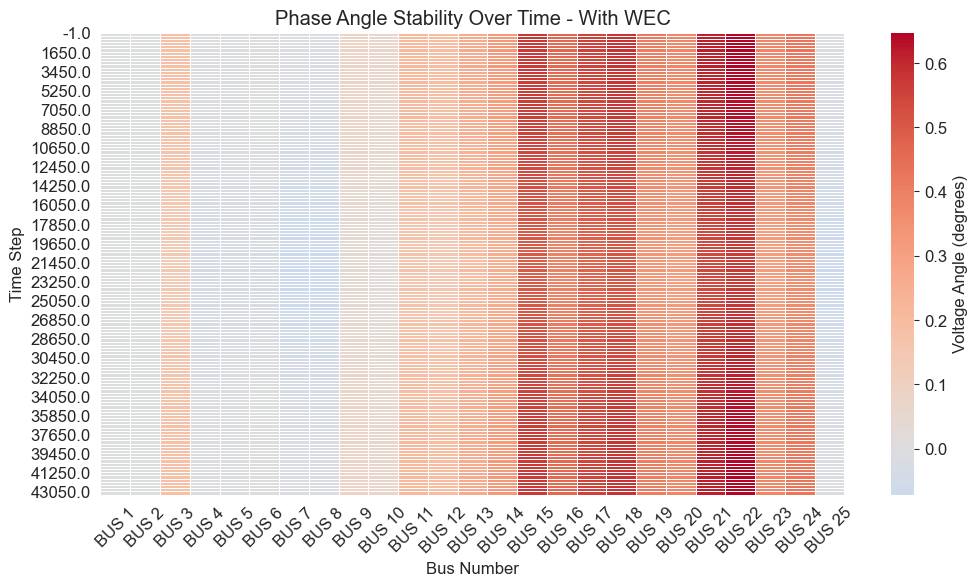

In [39]:
# Extract Voltage Angle (ANGLE) data from history
def extract_angle_data(history):
    angle_data = {time: df.set_index("Bus")["ANGLE"] for time, df in history.items()}
    return pd.DataFrame(angle_data).T  # Time as rows, Buses as columns

# Extract for both cases
angle_no_wec = extract_angle_data(no_wec_history)
angle_wec = extract_angle_data(wec_history)

# Plot heatmap for No WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(angle_no_wec, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Voltage Angle (degrees)'})
plt.title("Phase Angle Stability Over Time - No WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for With WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(angle_wec, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Voltage Angle (degrees)'})
plt.title("Phase Angle Stability Over Time - With WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

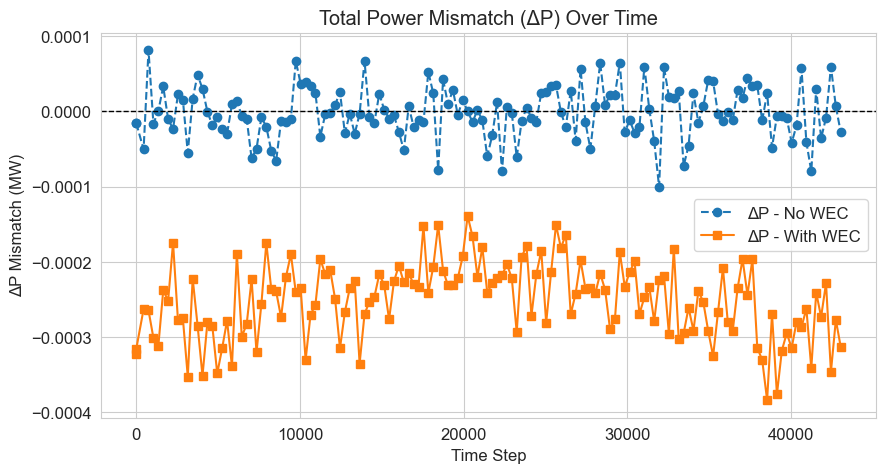

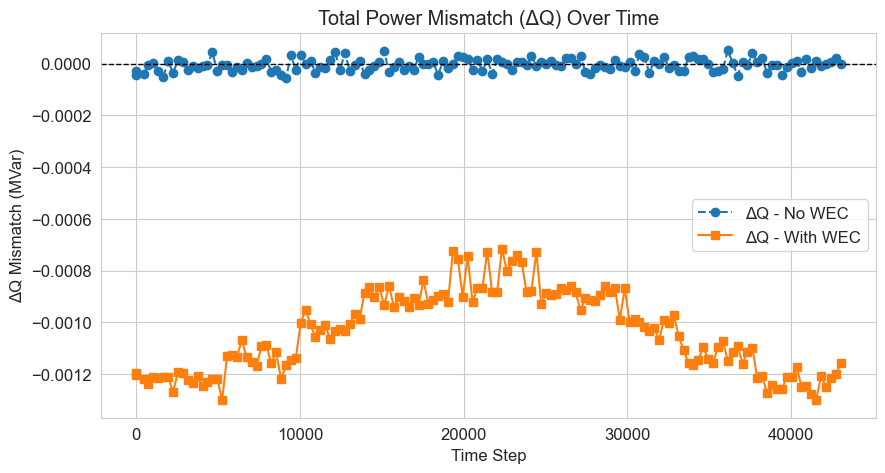

In [40]:
# Extract ΔP and ΔQ mismatch data over time
def extract_mismatch_data(history, column):
    mismatch_data = {time: df.set_index("Bus")[column].sum() for time, df in history.items()}
    return pd.Series(mismatch_data)

# Extract for both cases
dp_no_wec = extract_mismatch_data(no_wec_history, "ΔP")
dq_no_wec = extract_mismatch_data(no_wec_history, "ΔQ")
dp_wec = extract_mismatch_data(wec_history, "ΔP")
dq_wec = extract_mismatch_data(wec_history, "ΔQ")

# Plot ΔP and ΔQ mismatch over time
plt.figure(figsize=(10, 5))
plt.plot(dp_no_wec.index, dp_no_wec.values, label="ΔP - No WEC", linestyle="--", marker="o")
plt.plot(dp_wec.index, dp_wec.values, label="ΔP - With WEC", linestyle="-", marker="s")
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.xlabel("Time Step")
plt.ylabel("ΔP Mismatch (MW)")
plt.title("Total Power Mismatch (ΔP) Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dq_no_wec.index, dq_no_wec.values, label="ΔQ - No WEC", linestyle="--", marker="o")
plt.plot(dq_wec.index, dq_wec.values, label="ΔQ - With WEC", linestyle="-", marker="s")
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.xlabel("Time Step")
plt.ylabel("ΔQ Mismatch (MVar)")
plt.title("Total Power Mismatch (ΔQ) Over Time")
plt.legend()
plt.show()

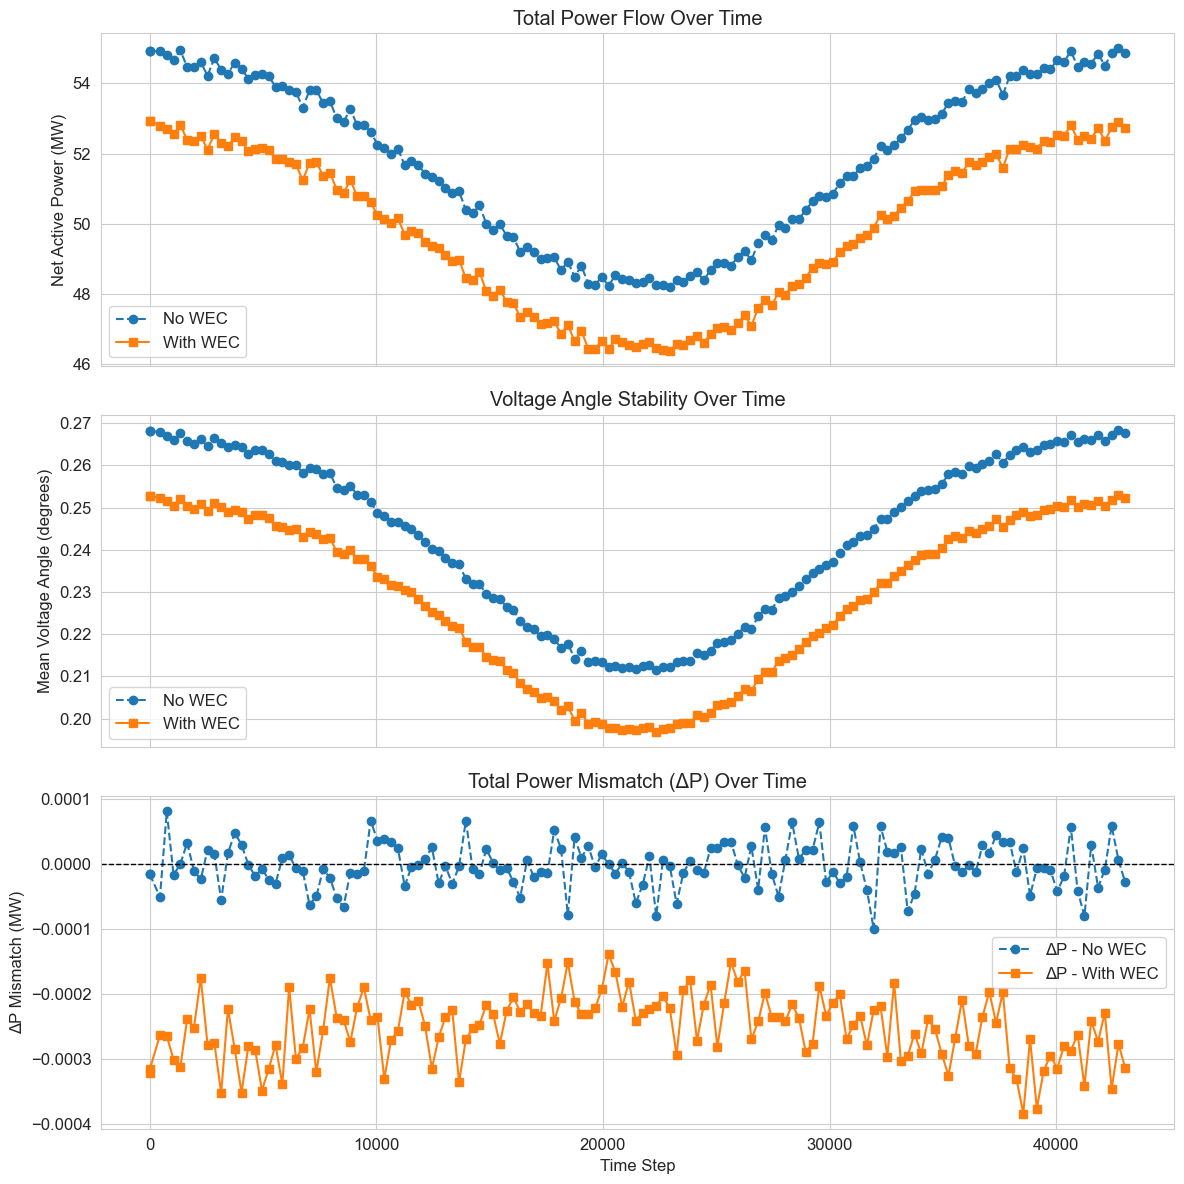

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract P_net for No WEC & WEC
p_net_no_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in no_wec_history.values()]
p_net_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in wec_history.values()]

# Extract Voltage Angle
angle_no_wec = [df["ANGLE"].mean() for df in no_wec_history.values()]
angle_wec = [df["ANGLE"].mean() for df in wec_history.values()]

# Extract Power Mismatch ΔP
dp_no_wec = [df["ΔP"].sum() for df in no_wec_history.values()]
dp_wec = [df["ΔP"].sum() for df in wec_history.values()]

# 📌 1️⃣ Net Active Power Over Time
axes[0].plot(time_steps, [p.sum() for p in p_net_no_wec], label="No WEC", linestyle="--", marker="o")
axes[0].plot(time_steps, [p.sum() for p in p_net_wec], label="With WEC", linestyle="-", marker="s")
axes[0].set_ylabel("Net Active Power (MW)")
axes[0].set_title("Total Power Flow Over Time")
axes[0].legend()
axes[0].grid(True)

# 📌 2️⃣ Voltage Angle Stability Over Time
axes[1].plot(time_steps, angle_no_wec, label="No WEC", linestyle="--", marker="o")
axes[1].plot(time_steps, angle_wec, label="With WEC", linestyle="-", marker="s")
axes[1].set_ylabel("Mean Voltage Angle (degrees)")
axes[1].set_title("Voltage Angle Stability Over Time")
axes[1].legend()
axes[1].grid(True)

# 📌 3️⃣ Power Mismatch ΔP Over Time
axes[2].plot(time_steps, dp_no_wec, label="ΔP - No WEC", linestyle="--", marker="o")
axes[2].plot(time_steps, dp_wec, label="ΔP - With WEC", linestyle="-", marker="s")
axes[2].axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
axes[2].set_ylabel("ΔP Mismatch (MW)")
axes[2].set_title("Total Power Mismatch (ΔP) Over Time")
axes[2].legend()
axes[2].grid(True)

# Set x-axis label for all
axes[-1].set_xlabel("Time Step")

plt.tight_layout()
plt.show()

In [19]:
import matplotlib.pyplot as plt

# Set high DPI for better resolution
plt.rcParams["figure.dpi"] = 300

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract Data for No WEC & WEC
p_net_no_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in no_wec_history.values()]
p_net_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in wec_history.values()]

angle_no_wec = [df["ANGLE"].mean() for df in no_wec_history.values()]
angle_wec = [df["ANGLE"].mean() for df in wec_history.values()]

dp_no_wec = [df["MISMATCH"].sum() for df in no_wec_history.values()]
dp_wec = [df["MISMATCH"].sum() for df in wec_history.values()]

voltage_mag_no_wec = [df["PU"].mean() for df in no_wec_history.values()]
voltage_mag_wec = [df["PU"].mean() for df in wec_history.values()]

# Common plot settings
plot_kwargs_no_wec = {"linestyle": "--", "marker": "o", "markersize": 4, "linewidth": 1}
plot_kwargs_wec = {"linestyle": "-", "marker": "s", "markersize": 4, "linewidth": 1.2}

# 📌 1️⃣ Net Active Power Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, [p.sum() for p in p_net_no_wec], label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, [p.sum() for p in p_net_wec], label="With WEC", **plot_kwargs_wec)
plt.ylabel("Net Active Power (MW)")
plt.legend()
plt.grid(True)
plt.savefig("net_active_power.png", dpi=300, bbox_inches="tight")
plt.savefig("net_active_power.pdf", bbox_inches="tight")
plt.close()

# 📌 2️⃣ Voltage Angle Stability Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, angle_no_wec, label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, angle_wec, label="With WEC", **plot_kwargs_wec)
plt.ylabel("Mean Voltage Angle (°)")
plt.legend()
plt.grid(True)
plt.savefig("voltage_angle.png", dpi=300, bbox_inches="tight")
plt.savefig("voltage_angle.pdf", bbox_inches="tight")
plt.close()

# 📌 3️⃣ Power Mismatch ΔP Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, dp_no_wec, label="ΔP - No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, dp_wec, label="ΔP - With WEC", **plot_kwargs_wec)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.ylabel("Mismatch (MW)")
plt.legend()
plt.grid(True)
plt.savefig("power_mismatch.png", dpi=300, bbox_inches="tight")
plt.savefig("power_mismatch.pdf", bbox_inches="tight")
plt.close()

# 📌 4️⃣ Voltage Magnitude Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, voltage_mag_no_wec, label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, voltage_mag_wec, label="With WEC", **plot_kwargs_wec)
plt.ylabel("Mean Voltage Magnitude (p.u.)")
plt.legend()
plt.grid(True)
plt.savefig("voltage_magnitude.png", dpi=300, bbox_inches="tight")
plt.savefig("voltage_magnitude.pdf", bbox_inches="tight")
plt.close()